# DATASET INFO

 This data set is the Kaggle version of the very well known public data set for asset degradation modeling from NASA. It includes Run-to-Failure simulated data from turbo fan jet engines.

The goal is to predict the remaining useful life (RUL) of each engine in the test dataset. RUL is equivalent of number of flights remained for the engine after the last datapoint in the test dataset.

The dataset, organized into four sets FD001 to FD004, comprises time series snapshots with 26 columns, including operational settings, sensor measurements, and unit information. Conditions vary, such as Sea Level or SIX conditions, and fault modes include HPC and Fan Degradation

Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

# Analyze the Dataset

In [ ]:
# Prepare column names

index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "Fan inlet temperature (◦R)",
"LPC outlet temperature (◦R)",
"HPC outlet temperature (◦R)",
"LPT outlet temperature (◦R)",
"Fan inlet Pressure (psia)",
"bypass-duct pressure (psia)",
"HPC outlet pressure (psia)",
"Physical fan speed (rpm)",
"Physical core speed (rpm)",
"Engine pressure ratio (P50/P2)",
"HPC outlet Static pressure (psia)",
"Ratio of fuel flow to Ps30 (pps/psia)",
"Corrected fan speed (rpm)",
"Corrected core speed (rpm)",
"Bypass Ratio ",
"Burner fuel-air ratio",
"Bleed Enthalpy",
"Required fan speed",
"Required fan conversion speed",
"High-pressure turbines Cool air flow",
"Low-pressure turbines Cool air flow" ]

col_names = index_names + setting_names + sensor_names

### Loading the dataset

In [ ]:
# Load dataset

train_data=pd.read_csv('train_FD001.txt',sep='\s+',header=None, index_col=False, names=col_names)

## Adding the RUL to the dataset

In [ ]:
# Function that adds "life" column and drops "max_cycle" column from the dataframe

def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='engine')
    max_time_cycles = train_grouped_by_unit['cycle'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_cycle'), left_on='engine',right_index=True)
    merged["life"] = merged["max_cycle"] - merged['cycle']
    merged = merged.drop("max_cycle", axis=1)
    return merged

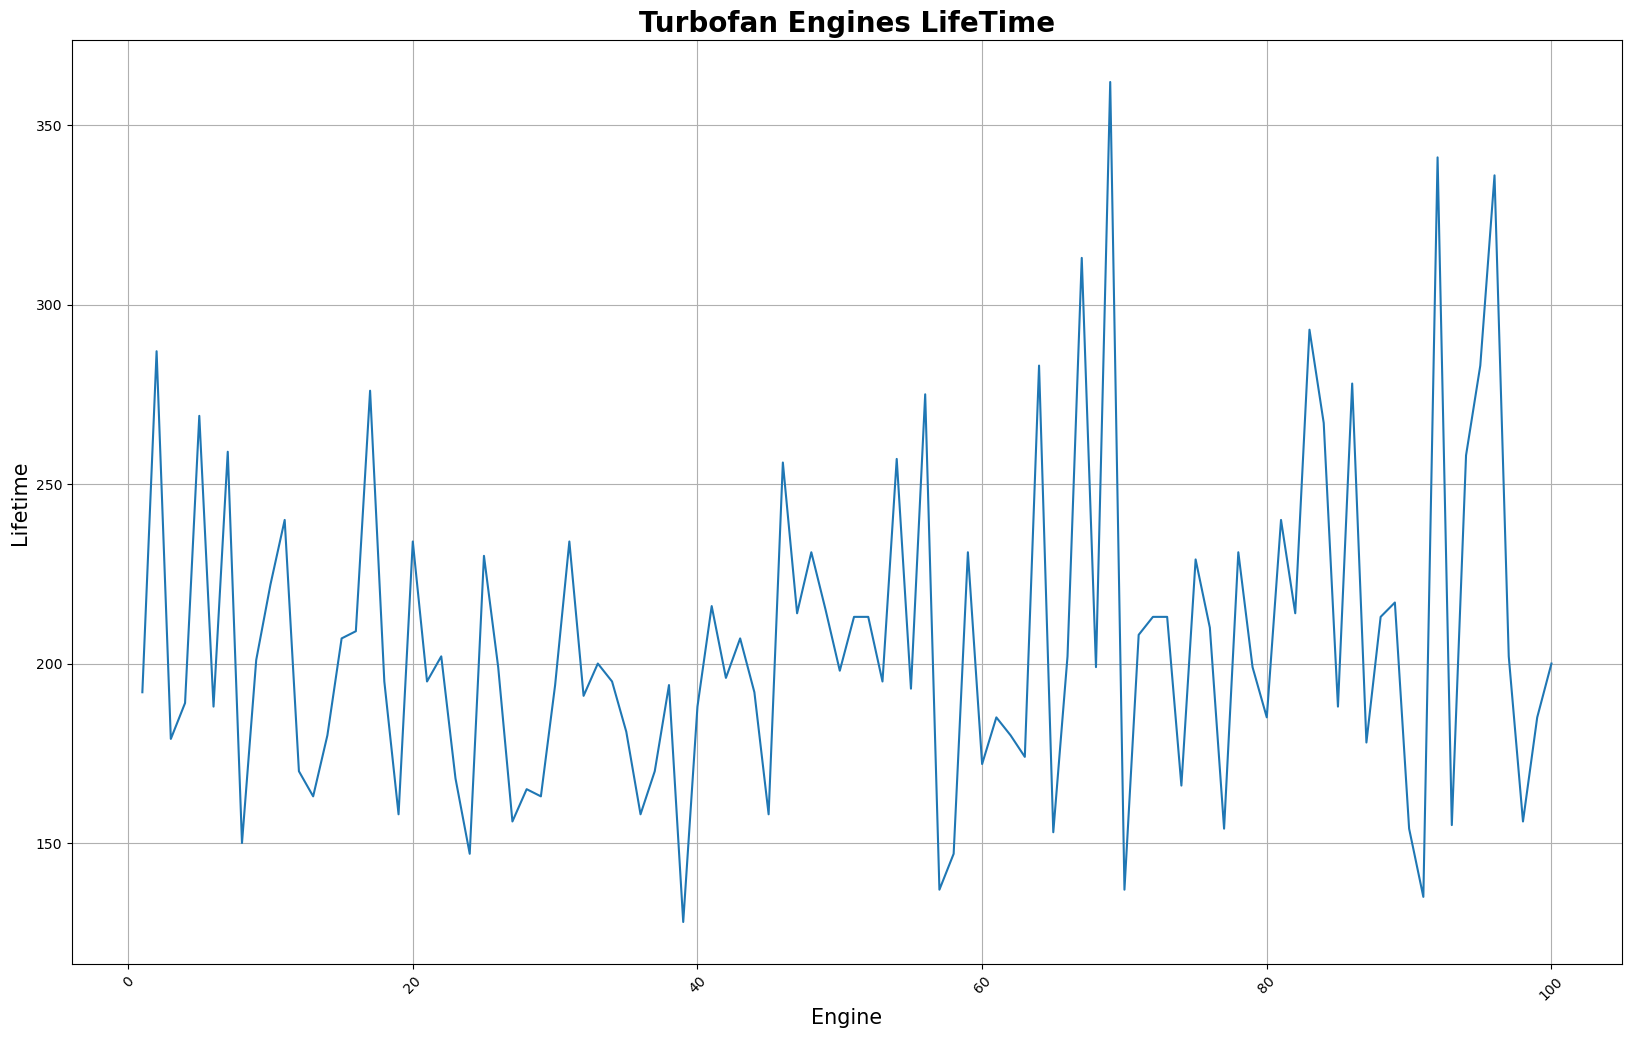

In [ ]:
# Plot engines lifetime

life=train_data[index_names].groupby('engine').max()
life.rename(columns={'cycle':'life'},inplace=True)
life['life'].plot(figsize=(20, 12), rot=45)
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=20)
plt.xlabel('Engine', size=15)
plt.ylabel('Lifetime', size=15)
plt.grid()


<Figure size 3000x1500 with 0 Axes>

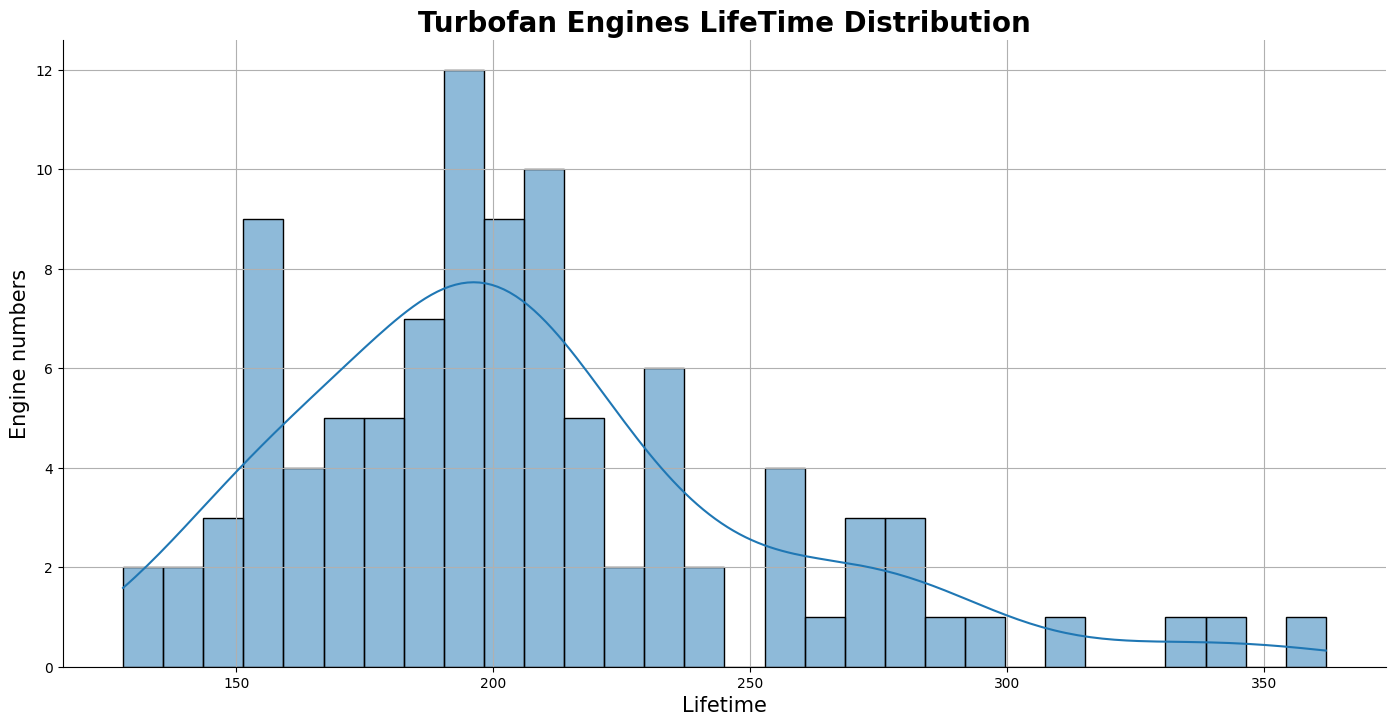

In [ ]:
# Plot engines lifetime distribution

plt.figure(figsize=(30, 15))
sns.displot(life['life'],kde=True,bins=30,height=7, aspect=2)
plt.title('Turbofan Engines LifeTime Distribution',fontweight='bold',size=20)
plt.grid()
plt.xlabel('Lifetime', size=15)
plt.ylabel('Engine numbers', size=15)
plt.show()

In [ ]:
# Add RUL to train dataset

train_data = add_RUL_column(train_data)
train_data

engine  cycle  setting_1  setting_2  setting_3  \
0           1      1    -0.0007    -0.0004      100.0   
1           1      2     0.0019    -0.0003      100.0   
2           1      3    -0.0043     0.0003      100.0   
3           1      4     0.0007     0.0000      100.0   
4           1      5    -0.0019    -0.0002      100.0   
...       ...    ...        ...        ...        ...   
20626     100    196    -0.0004    -0.0003      100.0   
20627     100    197    -0.0016    -0.0005      100.0   
20628     100    198     0.0004     0.0000      100.0   
20629     100    199    -0.0011     0.0003      100.0   
20630     100    200    -0.0032    -0.0005      100.0   

       Fan inlet temperature (◦R)  LPC outlet temperature (◦R)  \
0                          518.67                       641.82   
1                          518.67                       642.15   
2                          518.67                       642.35   
3                          518.67                       642.35   
4                          518.67                       642.37   
...                           ...                          ...   
20626                      518.67                       643.49   
20627                      518.67                       643.54   
20628                      518.67                       643.42   
20629                      518.67                       643.23   
20630                      518.67                       643.85   

       HPC outlet temperature (◦R)  LPT outlet temperature (◦R)  \
0                          1589.70                      1400.60   
1                          1591.82                      1403.14   
2                          1587.99                      1404.20   
3                          1582.79                      1401.87   
4                          1582.85                      1406.22   
...                            ...                          ...   
20626                      1597.98                      1428.63   
20627                      1604.50                      1433.58   
20628                      1602.46                      1428.18   
20629                      1605.26                      1426.53   
20630                      1600.38                      1432.14   

       Fan inlet Pressure (psia)  ...  Corrected fan speed (rpm)  \
0                          14.62  ...                    2388.02   
1                          14.62  ...                    2388.07   
2                          14.62  ...                    2388.03   
3                          14.62  ...                    2388.08   
4                          14.62  ...                    2388.04   
...                          ...  ...                        ...   
20626                      14.62  ...                    2388.26   
20627                      14.62  ...                    2388.22   
20628                      14.62  ...                    2388.24   
20629                      14.62  ...                    2388.23   
20630                      14.62  ...                    2388.26   

       Corrected core speed (rpm)  Bypass Ratio   Burner fuel-air ratio  \
0                         8138.62         8.4195                   0.03   
1                         8131.49         8.4318                   0.03   
2                         8133.23         8.4178                   0.03   
3                         8133.83         8.3682                   0.03   
4                         8133.80         8.4294                   0.03   
...                           ...            ...                    ...   
20626                     8137.60         8.4956                   0.03   
20627                     8136.50         8.5139                   0.03   
20628                     8141.05         8.5646                   0.03   
20629                     8139.29         8.5389                   0.03   
20630                     8137.33         8.5036                   0.03   

      

We can now further analyse the dataset to remove columns that are not useful for training

In [ ]:
train_data.describe().T

count         mean           std  \
engine                                 20631.0    51.506568  2.922763e+01   
cycle                                  20631.0   108.807862  6.888099e+01   
setting_1                              20631.0    -0.000009  2.187313e-03   
setting_2                              20631.0     0.000002  2.930621e-04   
setting_3                              20631.0   100.000000  0.000000e+00   
Fan inlet temperature (◦R)             20631.0   518.670000  6.537152e-11   
LPC outlet temperature (◦R)            20631.0   642.680934  5.000533e-01   
HPC outlet temperature (◦R)            20631.0  1590.523119  6.131150e+00   
LPT outlet temperature (◦R)            20631.0  1408.933782  9.000605e+00   
Fan inlet Pressure (psia)              20631.0    14.620000  3.394700e-12   
bypass-duct pressure (psia)            20631.0    21.609803  1.388985e-03   
HPC outlet pressure (psia)             20631.0   553.367711  8.850923e-01   
Physical fan speed (rpm)               20631.0  2388.096652  7.098548e-02   
Physical core speed (rpm)              20631.0  9065.242941  2.208288e+01   
Engine pressure ratio (P50/P2)         20631.0     1.300000  4.660829e-13   
HPC outlet Static pressure (psia)      20631.0    47.541168  2.670874e-01   
Ratio of fuel flow to Ps30 (pps/psia)  20631.0   521.413470  7.375534e-01   
Corrected fan speed (rpm)              20631.0  2388.096152  7.191892e-02   
Corrected core speed (rpm)             20631.0  8143.752722  1.907618e+01   
Bypass Ratio                           20631.0     8.442146  3.750504e-02   
Burner fuel-air ratio                  20631.0     0.030000  1.556432e-14   
Bleed Enthalpy                         20631.0   393.210654  1.548763e+00   
Required fan speed                     20631.0  2388.000000  0.000000e+00   
Required fan conversion speed          20631.0   100.000000  0.000000e+00   
High-pressure turbines Cool air flow   20631.0    38.816271  1.807464e-01   
Low-pressure turbines Cool air flow    20631.0    23.289705  1.082509e-01   
life                                   20631.0   107.807862  6.888099e+01   

                                             min        25%        50%  \
engine                                    1.0000    26.0000    52.0000   
cycle                                     1.0000    52.0000   104.0000   
setting_1                                -0.0087    -0.0015     0.0000   
setting_2                                -0.0006    -0.0002     0.0000   
setting_3                               100.0000   100.0000   100.0000   
Fan inlet temperature (◦R)              518.6700   518.6700   518.6700   
LPC outlet temperature (◦R)             641.2100   642.3250   642.6400   
HPC outlet temperature (◦R)            1571.0400  1586.2600  1590.1000   
LPT outlet temperature (◦R)            1382.2500  1402.3600  1408.0400   
Fan inlet Pressure (psia)                14.6200    14.6200    14.6200   
bypass-duct pressure (psia)              21.6000    21.6100    21.6100   
HPC outlet pressure (psia)              549.8500   552.8100   553.4400   
Physical fan speed (rpm)               2387.9000  2388.0500  2388.0900   
Physical core speed (rpm)              9021.7300  9053.1000  9060.6600   
Engine pressure ratio (P50/P2)            1.3000     1.3000     1.3000   
HPC outlet Static pressure (psia)        46.8500    47.3500    47.5100   
Ratio of fuel flow to Ps30 (pps/psia)   518.6900   520.9600   521.4800   
Corrected fan speed (rpm)              2387.8800  2388.0400  2388.0900   
Corrected core speed (rpm)             8099.9400  8133.2450  8140.5400   
Bypass Ratio                              8.3249     8.4149     8.4389   
Burner fuel-air ratio                     0.0300     0.0300     0.0300   
Bleed Enthalpy                          388.0000   392.0000   393.0000   
Required fan speed                     2388.0000  2388.0000  2388.0000   
Required fan conversion speed           100.0000   100.0000   100.0000   
High-pressure turbines Cool air fl

Plotting the correlation matrix

<Axes: >

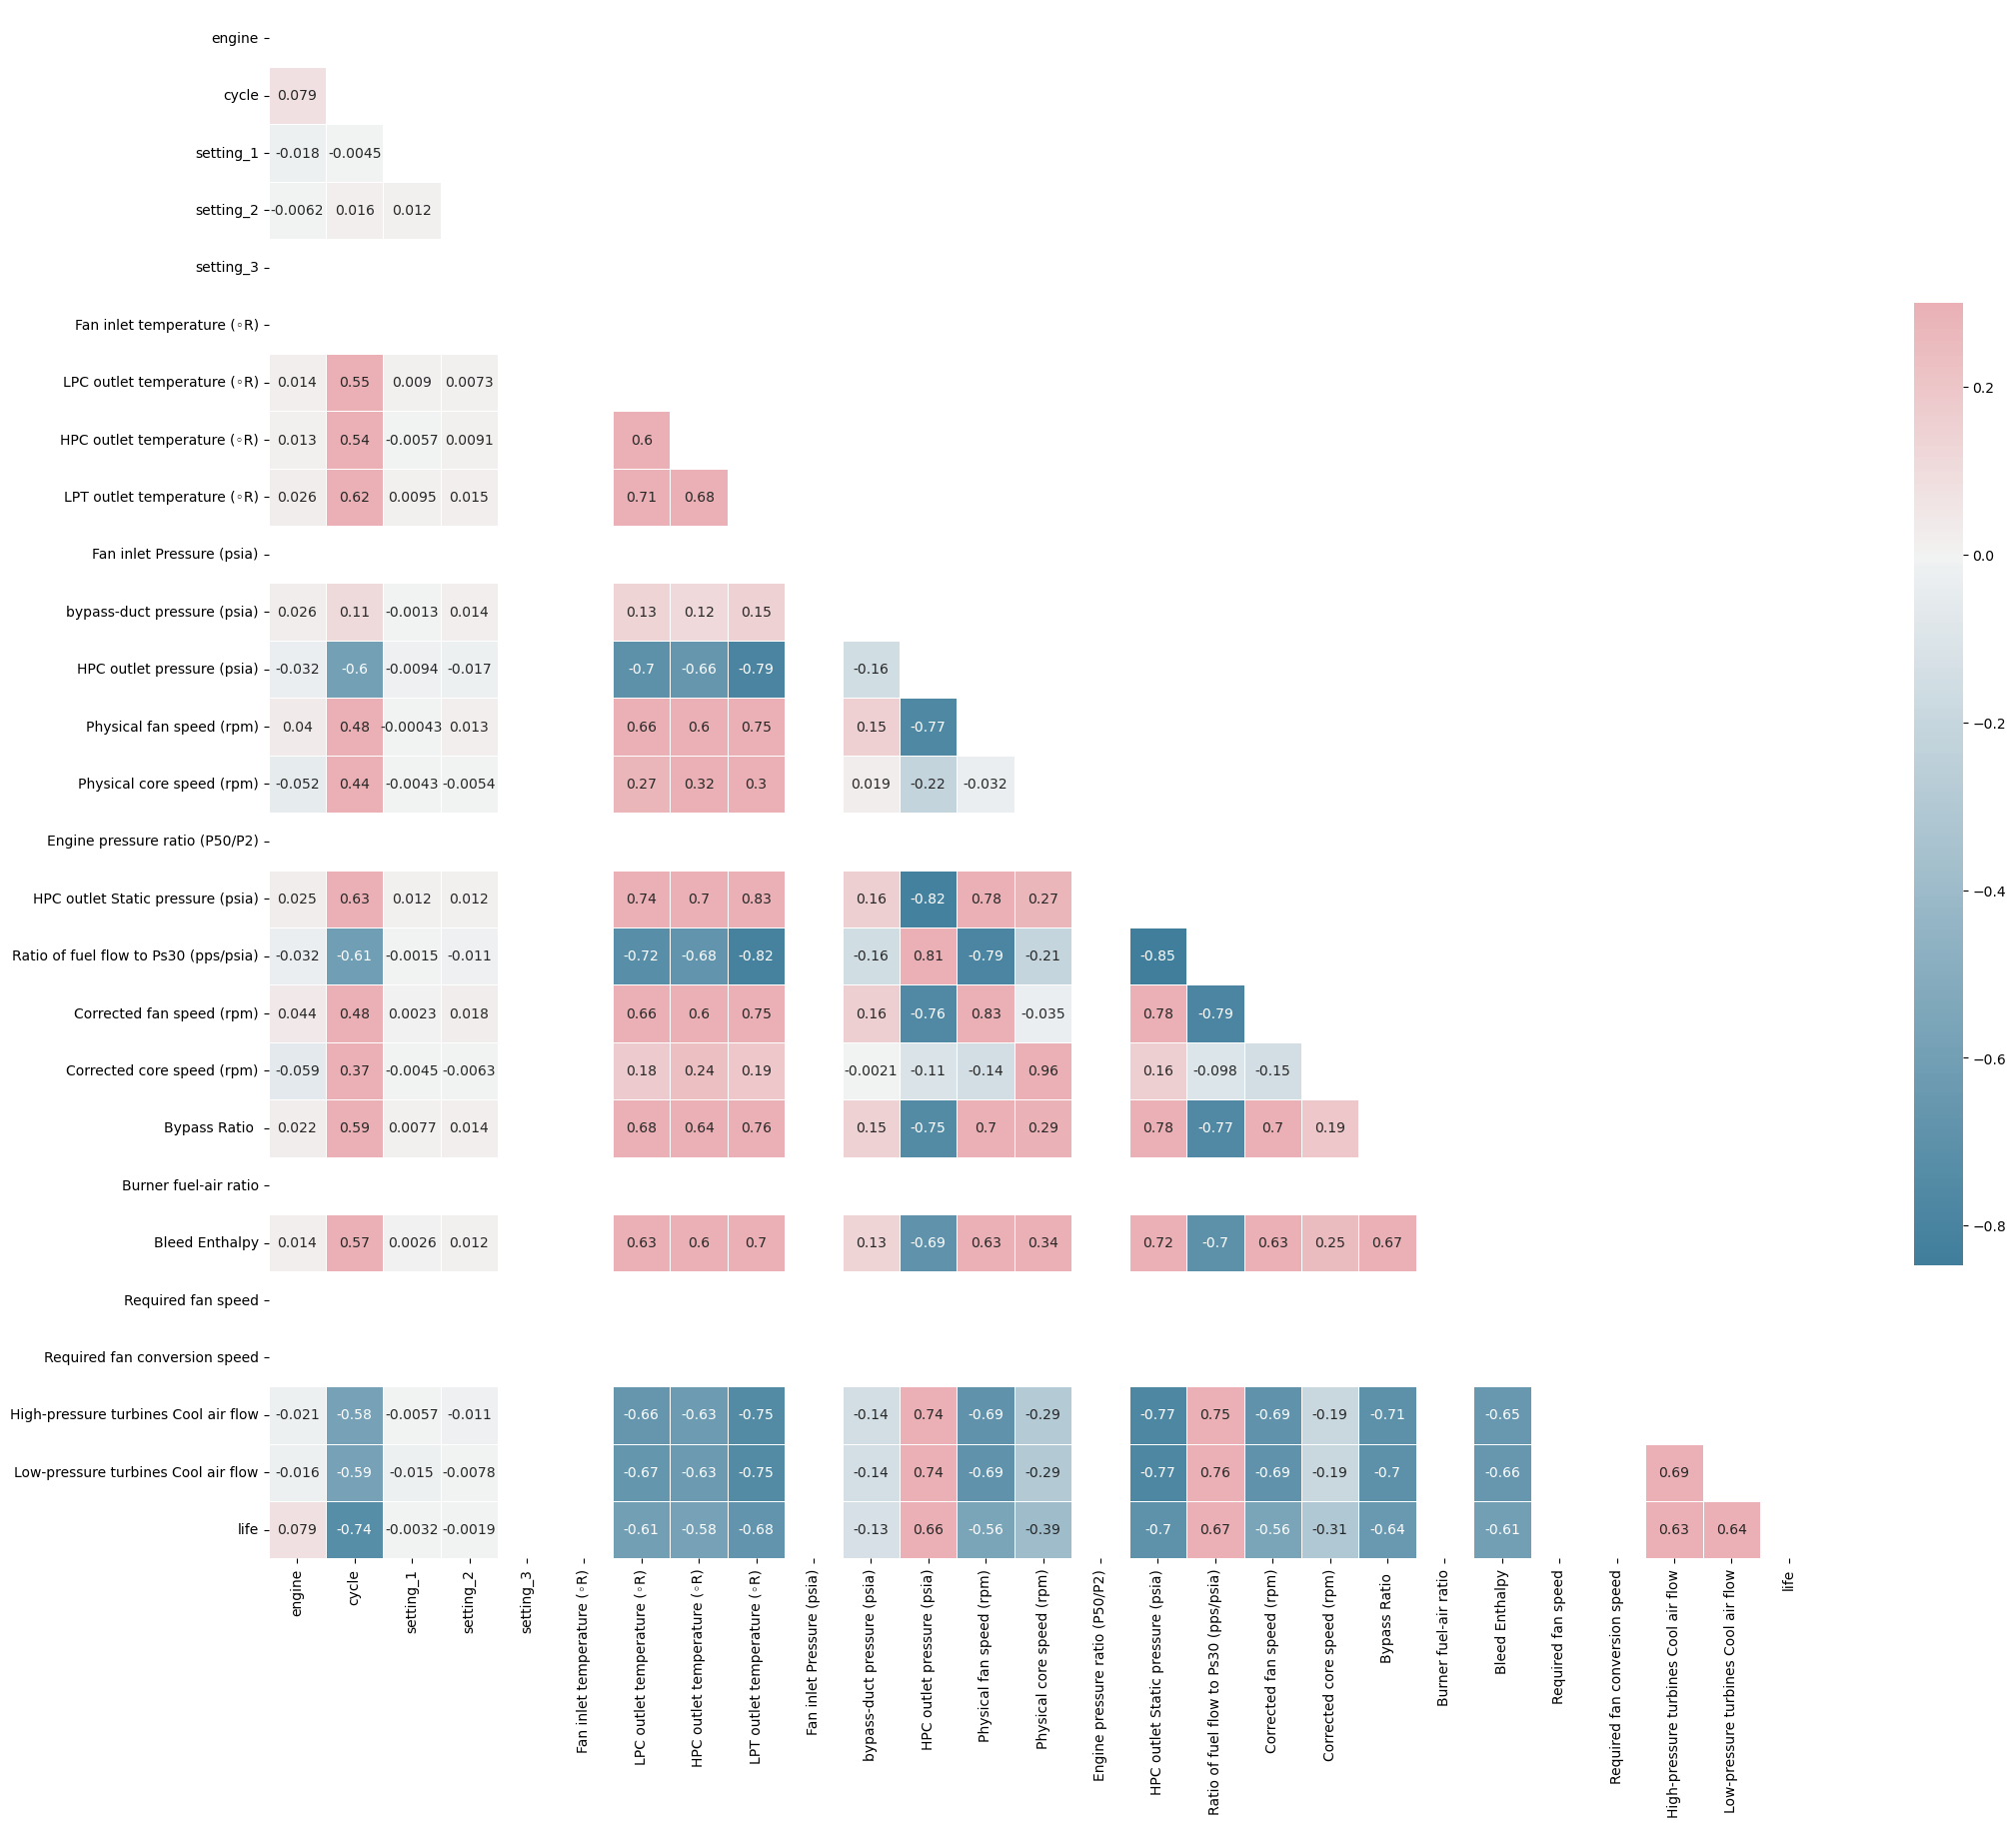

In [ ]:
corr = train_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

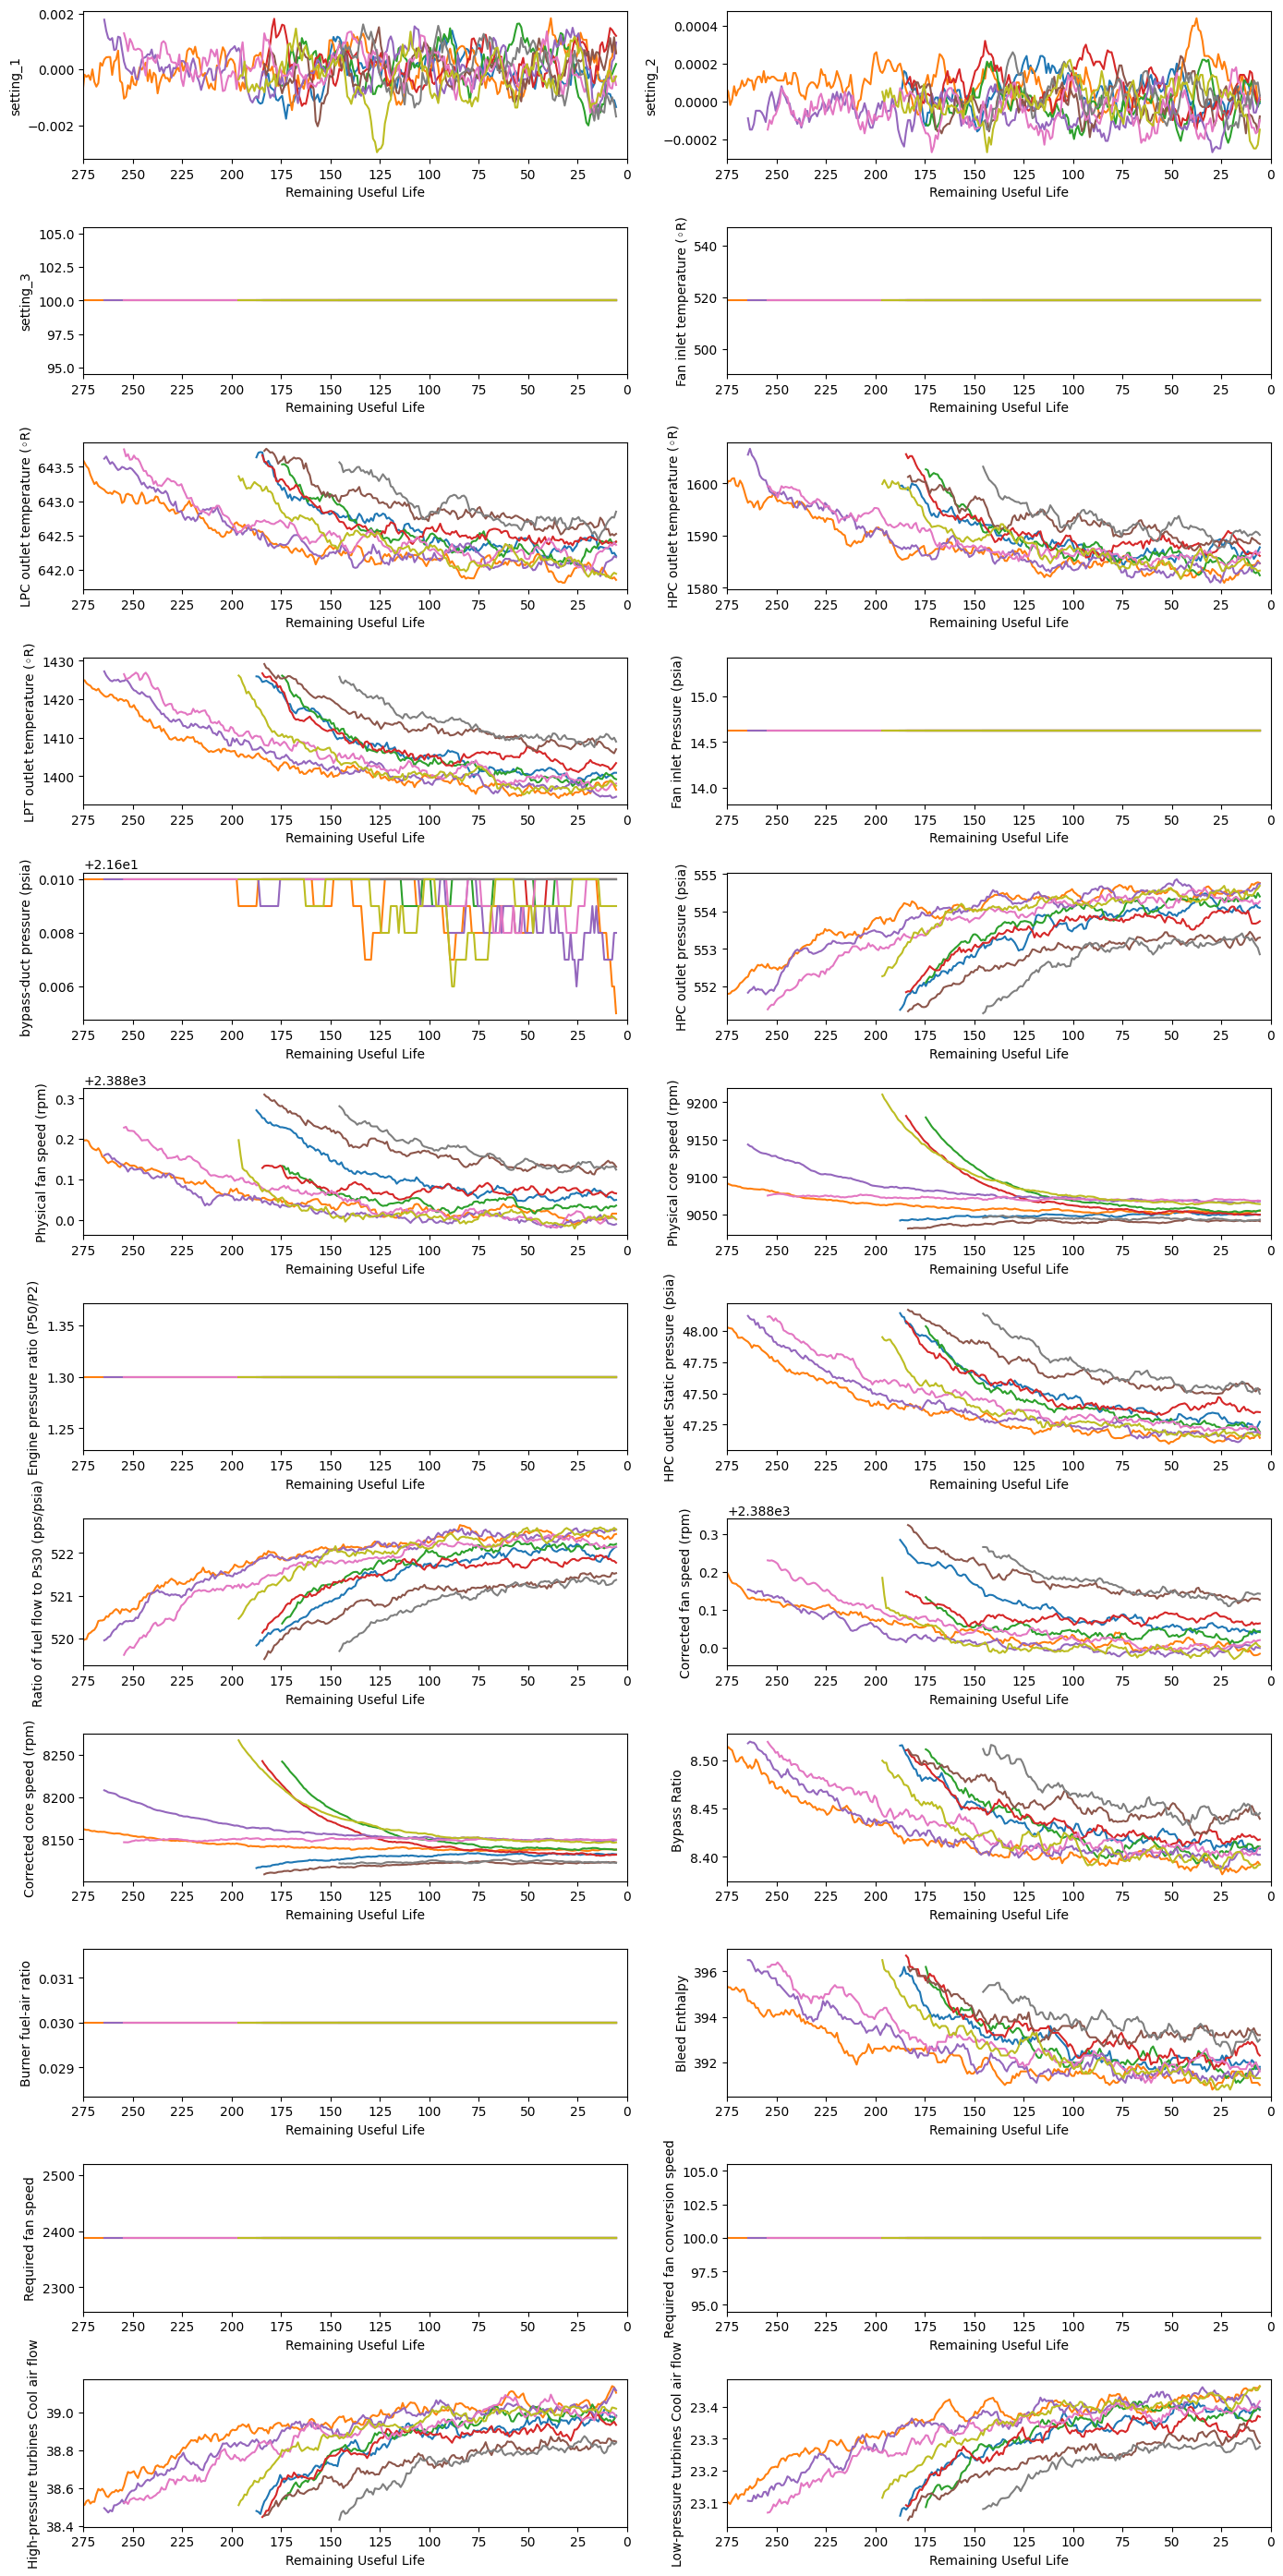

In [ ]:
colum_names = train_data.columns
colum_names = colum_names.drop(['engine', 'cycle', 'life'])
fig, axs = plt.subplots(int(len(colum_names) / 2), 2, figsize=(14, 28))  # 8 rows, 2 columns
for i, ax in enumerate(axs.flat):
    for j in train_data['engine'].unique():
        if j < 10:
            ax.plot('cycle', colum_names[i], data=train_data[train_data['engine']==j].rolling(10).mean())
            ax.set_ylabel(colum_names[i])
            ax.set_xlim(250, 0)
            ax.set_xticks(np.arange(0, 300, 25))
            ax.set_xlabel('Remaining Useful Life')
plt.tight_layout()
plt.show()

# Clean the dataset

There are features with constant value. Now we find features with constant values

In [ ]:
columns_with_constant_values = train_data.columns[train_data.nunique() == 1]
print(f'Features with constant values: {columns_with_constant_values.values}')

Features with constant values: ['setting_3' 'Fan inlet temperature (◦R)' 'Fan inlet Pressure (psia)'
 'Engine pressure ratio (P50/P2)' 'Burner fuel-air ratio'
 'Required fan speed' 'Required fan conversion speed']


So we can delete them

In [ ]:
train_data.drop(columns=columns_with_constant_values, inplace=True)
print(f"Deleted columns: {columns_with_constant_values.values}")

Deleted columns: ['setting_3' 'Fan inlet temperature (◦R)' 'Fan inlet Pressure (psia)'
 'Engine pressure ratio (P50/P2)' 'Burner fuel-air ratio'
 'Required fan speed' 'Required fan conversion speed']


We can also notice that the bypass-duct pressure (psia) column has only two unique values, so we can delete it

In [ ]:
train_data.drop(columns="bypass-duct pressure (psia)", inplace=True)
train_data

engine  cycle  setting_1  setting_2  LPC outlet temperature (◦R)  \
0           1      1    -0.0007    -0.0004                       641.82   
1           1      2     0.0019    -0.0003                       642.15   
2           1      3    -0.0043     0.0003                       642.35   
3           1      4     0.0007     0.0000                       642.35   
4           1      5    -0.0019    -0.0002                       642.37   
...       ...    ...        ...        ...                          ...   
20626     100    196    -0.0004    -0.0003                       643.49   
20627     100    197    -0.0016    -0.0005                       643.54   
20628     100    198     0.0004     0.0000                       643.42   
20629     100    199    -0.0011     0.0003                       643.23   
20630     100    200    -0.0032    -0.0005                       643.85   

       HPC outlet temperature (◦R)  LPT outlet temperature (◦R)  \
0                          1589.70                      1400.60   
1                          1591.82                      1403.14   
2                          1587.99                      1404.20   
3                          1582.79                      1401.87   
4                          1582.85                      1406.22   
...                            ...                          ...   
20626                      1597.98                      1428.63   
20627                      1604.50                      1433.58   
20628                      1602.46                      1428.18   
20629                      1605.26                      1426.53   
20630                      1600.38                      1432.14   

       HPC outlet pressure (psia)  Physical fan speed (rpm)  \
0                          554.36                   2388.06   
1                          553.75                   2388.04   
2                          554.26                   2388.08   
3                          554.45                   2388.11   
4                          554.00                   2388.06   
...                           ...                       ...   
20626                      551.43                   2388.19   
20627                      550.86                   2388.23   
20628                      550.94                   2388.24   
20629                      550.68                   2388.25   
20630                      550.79                   2388.26   

       Physical core speed (rpm)  HPC outlet Static pressure (psia)  \
0                        9046.19                              47.47   
1                        9044.07                              47.49   
2                        9052.94                              47.27   
3                        9049.48                              47.13   
4                        9055.15                              47.28   
...                          ...                                ...   
20626                    9065.52                              48.07   
20627                    9065.11                              48.04   
20628                    9065.90                              48.09   
20629                    9073.72                              48.39   
20630                    9061.48                              48.20   

       Ratio of fuel flow to Ps30 (pps/psia)  Corrected fan speed (rpm)  \
0                                     521.66                    2388.02   
1                                     522.28                    2388.07   
2                                     522.42                    2388.03   
3                                     522.86                    2388.08   
4                                     522.19                    2388.04   
...                                      ...                        ...   
20626                                 519.49                    2388.26   
20627                                 519.68                    2388.22   
20628           

We can delete the features with $correlation \leq |0.5|$ with the RUL.

In [ ]:
uncorrelated_columns = train_data.columns[(train_data.corr()['life'] < 0.5) & (train_data.corr()['life'] > -0.5)]
uncorrelated_columns = uncorrelated_columns.drop(['engine'])
train_data.drop(columns=uncorrelated_columns, inplace=True)
print("Deleted columns:", uncorrelated_columns)

Deleted columns: Index(['setting_1', 'setting_2', 'Physical core speed (rpm)',
       'Corrected core speed (rpm)'],
      dtype='object')


## We are left with only correlated columns

<Axes: >

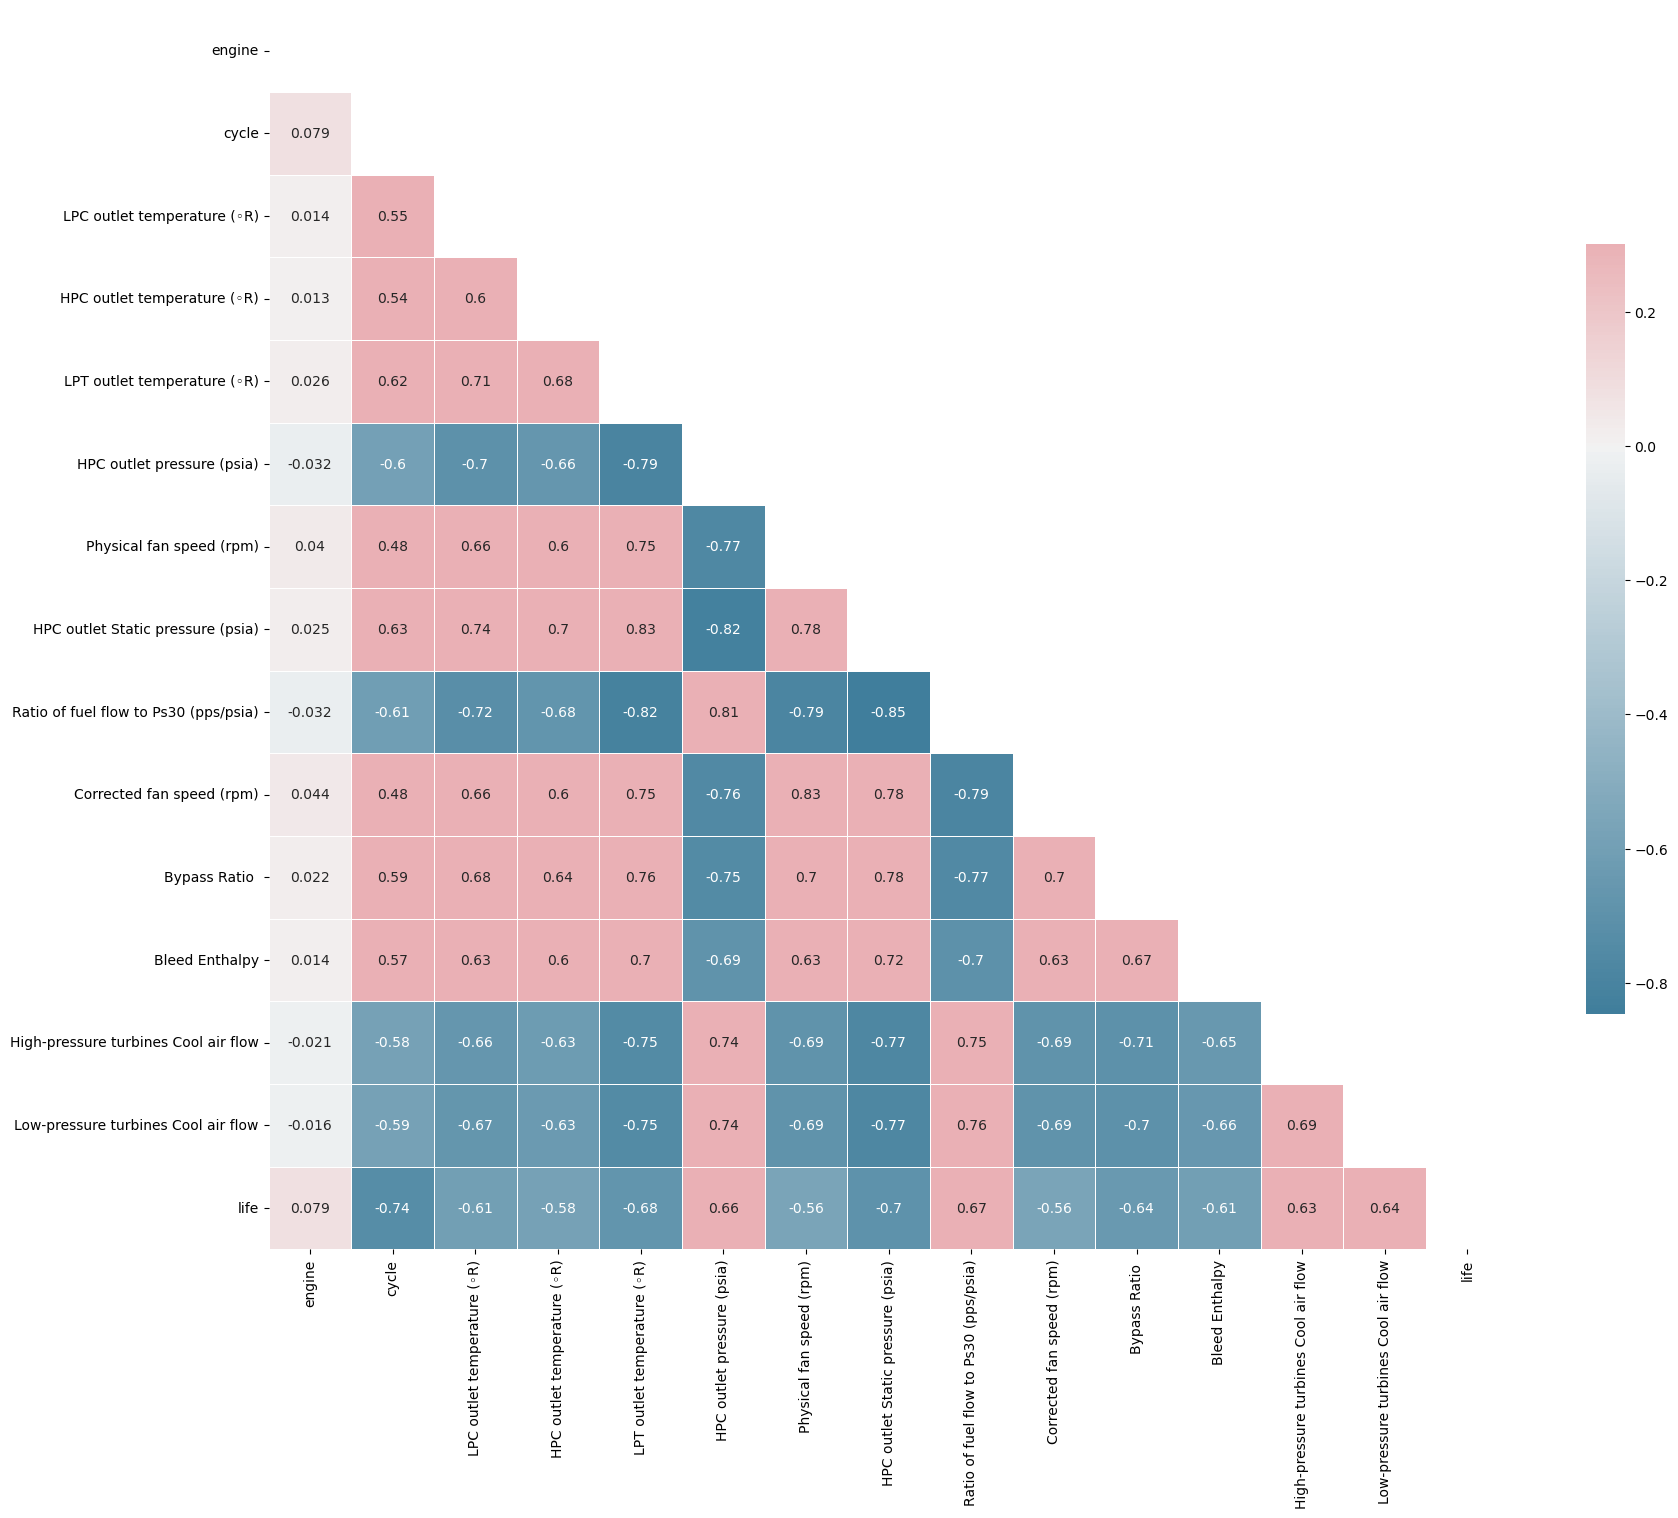

In [ ]:
# Compute and plot the correlation matrix
corr = train_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

We can see there is a lot of noise in the data that why we will smooth it.
We will use the rolling mean to smooth the data.
Using more then 10 rolling mean will make data lag behind. Thats why we choose 10.

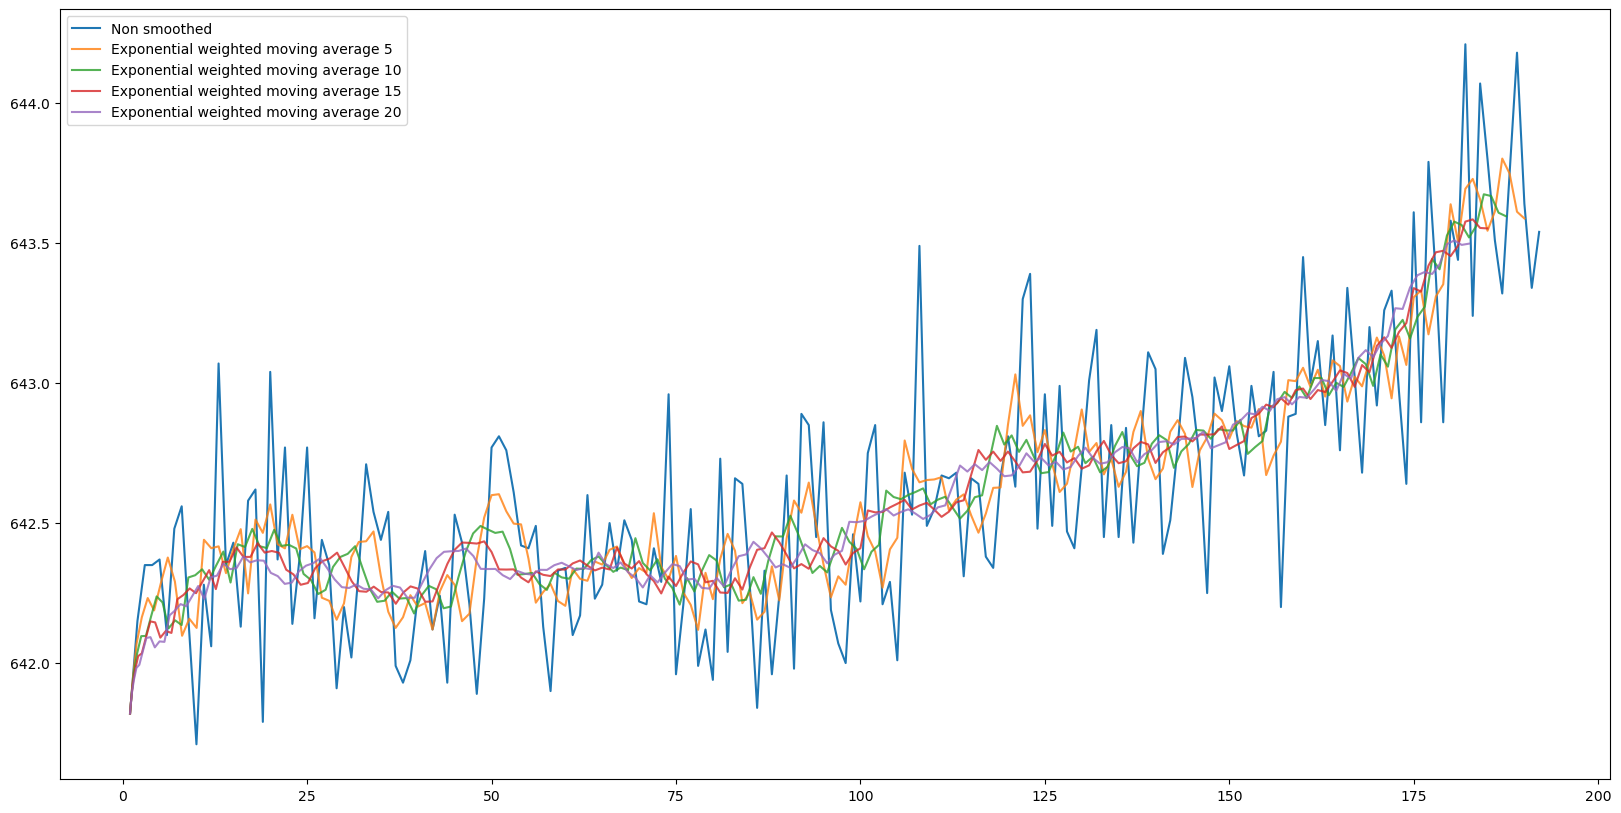

In [ ]:
# Smoothing the sensor data
sensor = 'LPC outlet temperature (◦R)'
engine = 1
plt.figure(figsize=(20,10))
plt.plot('cycle', sensor, data=train_data[train_data['engine']==engine], label='Non smoothed', alpha=1)
plt.plot('cycle', sensor, data=train_data[train_data['engine']==engine].ewm(span=5, adjust=False).mean(), label='Exponential weighted moving average 5', alpha=0.8)
plt.plot('cycle', sensor, data=train_data[train_data['engine']==engine].ewm(span=10, adjust=False).mean(), label='Exponential weighted moving average 10', alpha=0.8)
plt.plot('cycle', sensor, data=train_data[train_data['engine']==engine].ewm(span=15, adjust=False).mean(), label='Exponential weighted moving average 15', alpha=0.8)
plt.plot('cycle', sensor, data=train_data[train_data['engine']==engine].ewm(span=20, adjust=False).mean(), label='Exponential weighted moving average 20', alpha=0.8)

plt.legend()

In [ ]:
# Smooth the data and save it to new DF
remaining_sensor_names = train_data.columns.drop(['engine', 'cycle', 'life'])

train_data_smooth = train_data.copy()
train_data_smooth[remaining_sensor_names] = train_data_smooth.groupby('engine')[remaining_sensor_names].transform(lambda x: x.ewm(span=10, adjust=False).mean())

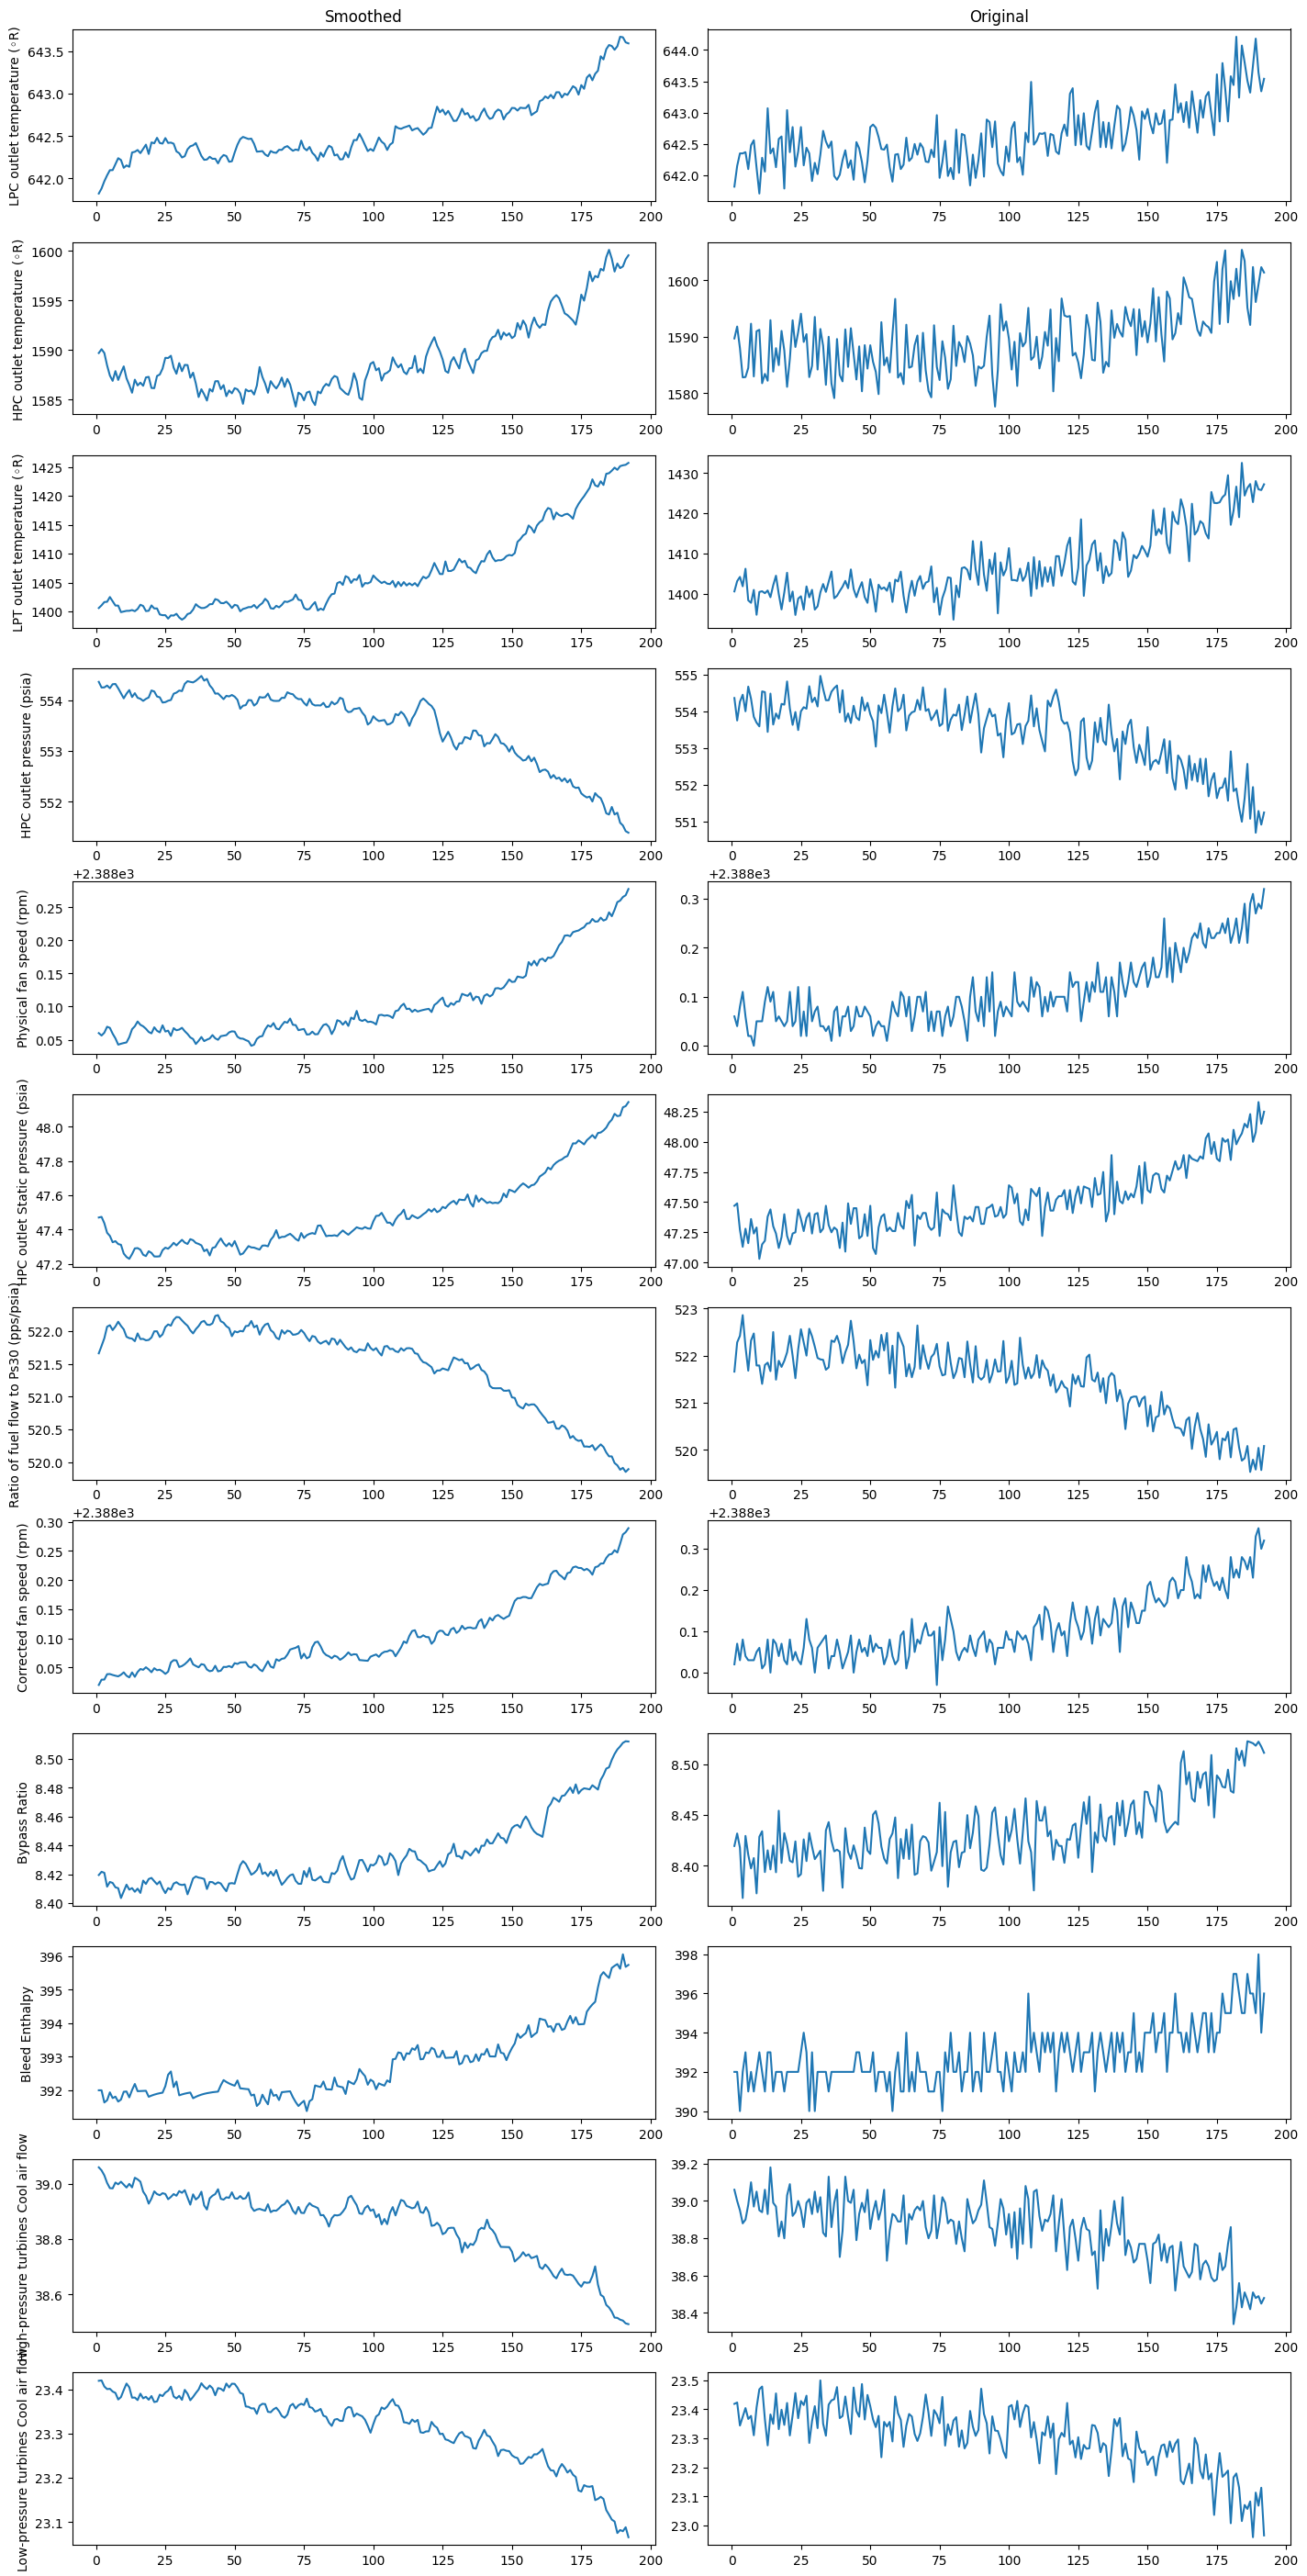

In [ ]:
# Plot the smooth data
fig, axs = plt.subplots(12, 2, figsize=(14, 28))
fig.tight_layout()
for i,sensor in enumerate(remaining_sensor_names):
    axs[i][0].plot('cycle', sensor, data=train_data_smooth[train_data['engine']==engine])
    axs[i][1].plot('cycle', sensor, data=train_data[train_data['engine']==engine])
    axs[i][0].set_ylabel(sensor)
    axs[0][0].set_title('Smoothed')
    axs[0][1].set_title('Original')
plt.show()

Set constant RUL if above 125

In [ ]:
train_data_smooth_125_cap = train_data_smooth.copy()
train_data_smooth_125_cap['life'] = train_data_smooth_125_cap['life'].apply(lambda x: 125 if x > 125 else x)

### We get better corelation after smoothing the data

First matrix is with RUL capped and smoth data, second without RUL capped, last is difference between them.

<Axes: >

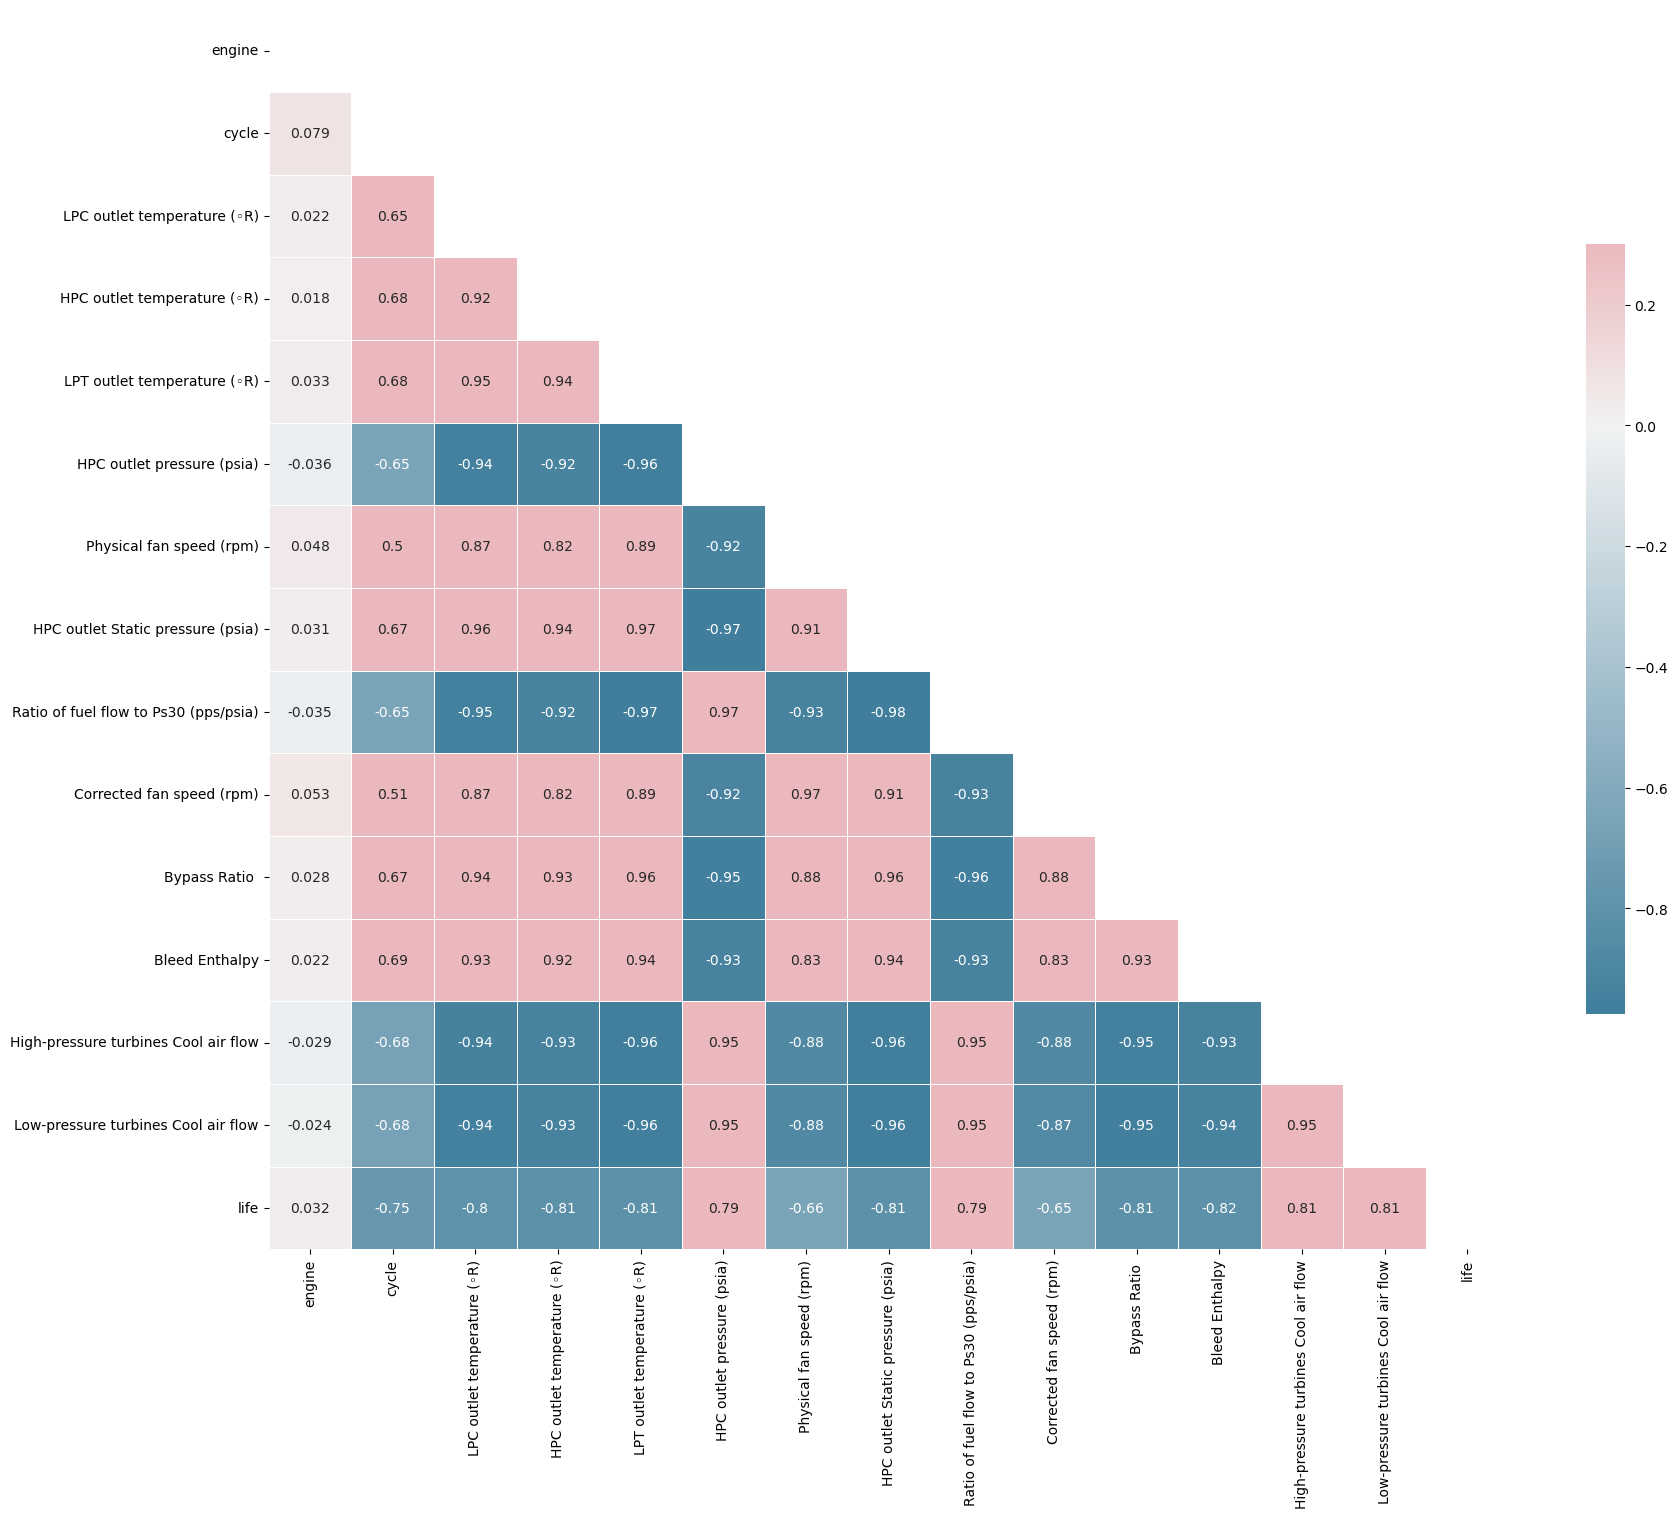

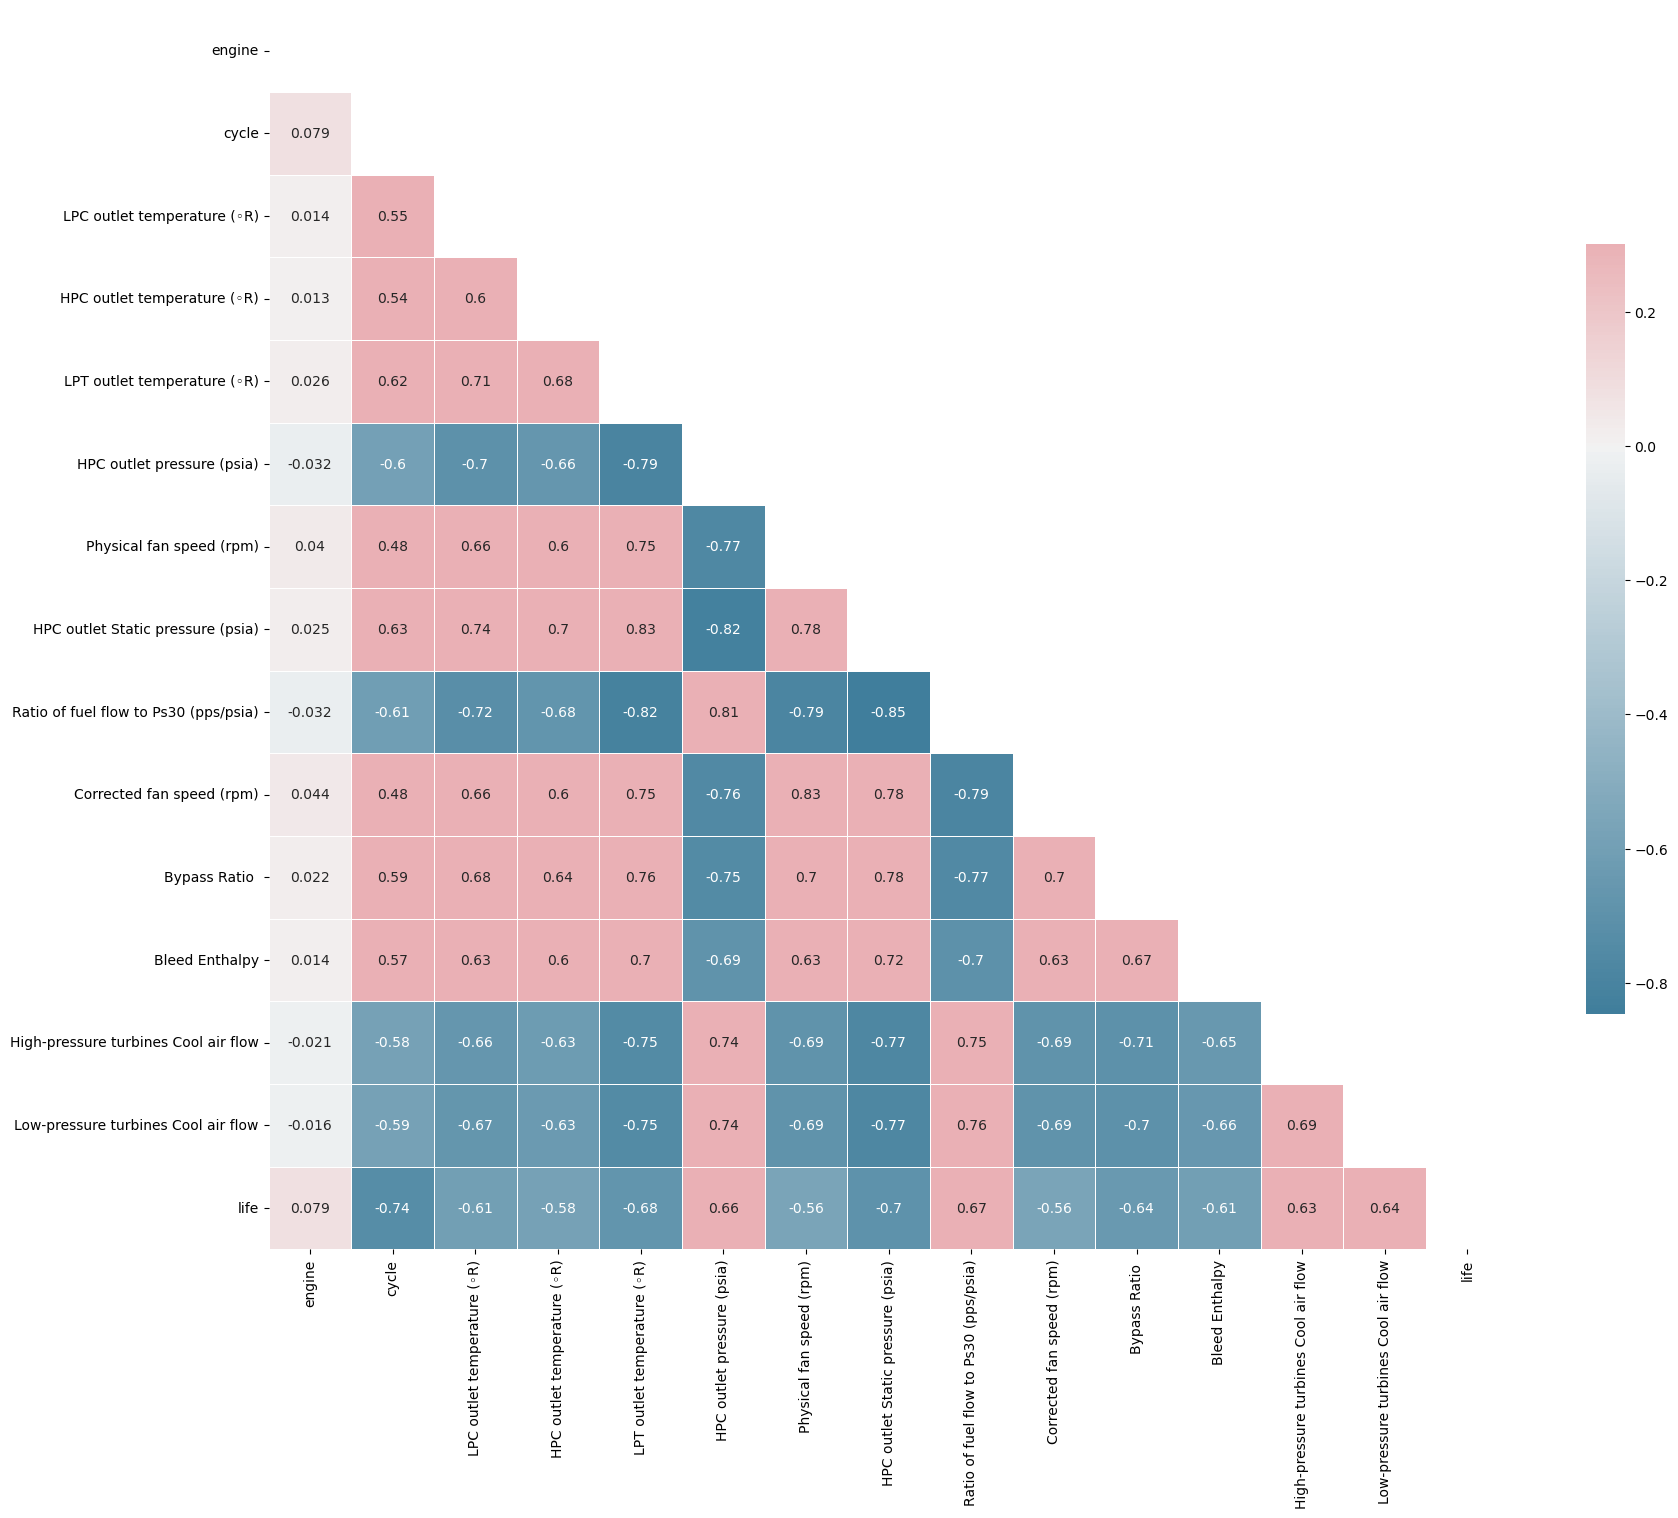

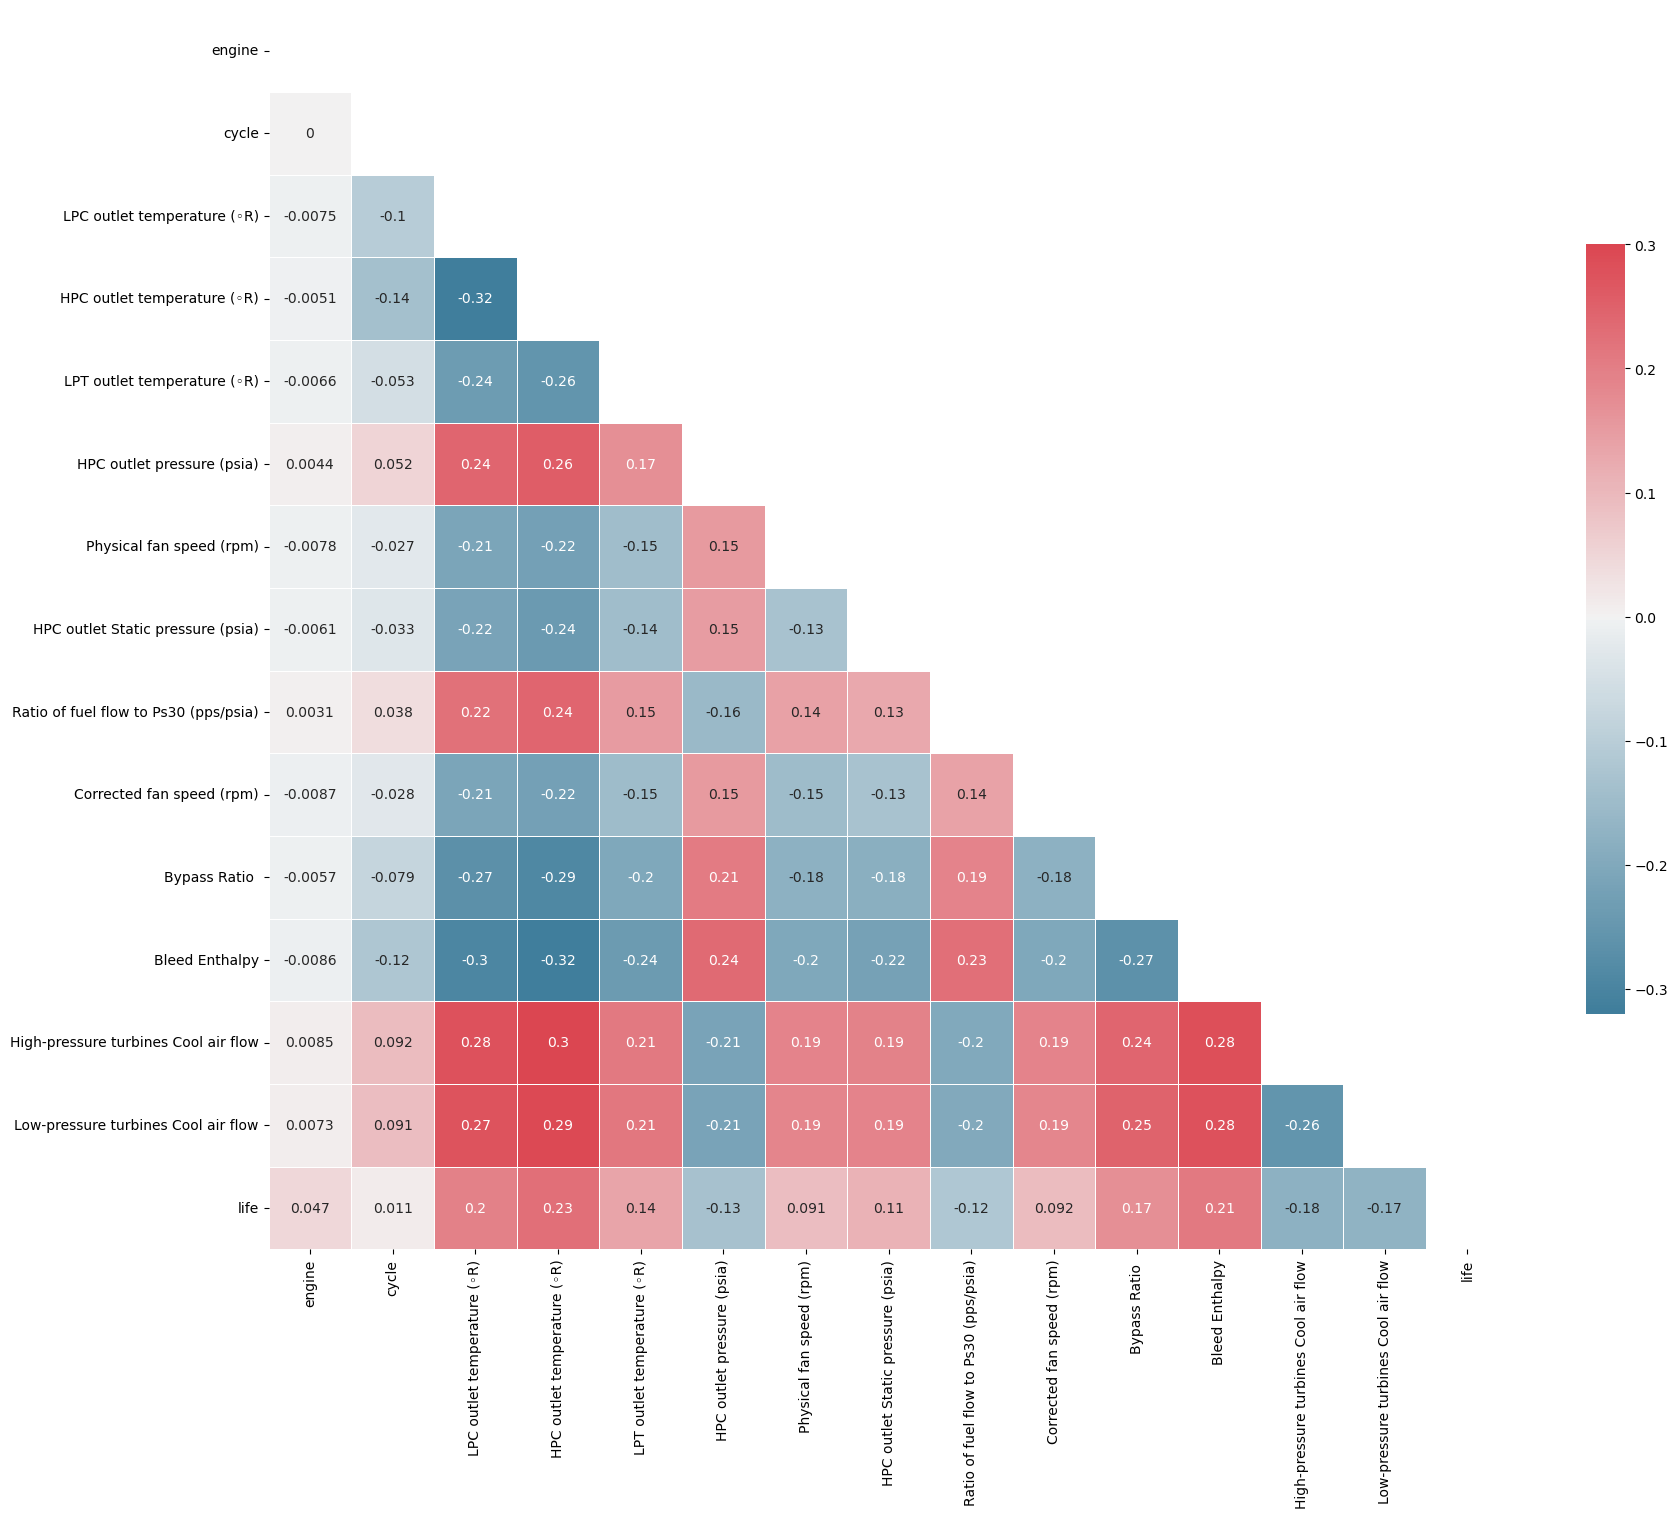

In [ ]:
# Corelation matrix of 125 cap
corr_125_cap = train_data_smooth_125_cap.corr()
mask = np.triu(np.ones_like(corr_125_cap, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 10, as_cmap=True)

sns.heatmap(corr_125_cap, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Diff between original and 125 cap
diff_matrix = corr  - corr_125_cap

mask = np.triu(np.ones_like(diff_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 10, as_cmap=True)

sns.heatmap(diff_matrix, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
train_data_smooth_125_cap=train_data_smooth_125_cap.drop(columns=['engine', 'cycle'])
train_data_smooth=train_data_smooth.drop(columns=['engine', 'cycle'])
train_data_smooth_125_cap

LPC outlet temperature (◦R)  HPC outlet temperature (◦R)  \
0                       641.820000                  1589.700000   
1                       641.880000                  1590.085455   
2                       641.965455                  1589.704463   
3                       642.035372                  1588.447288   
4                       642.096213                  1587.429599   
...                            ...                          ...   
20626                   643.452540                  1599.317478   
20627                   643.468442                  1600.259755   
20628                   643.459634                  1600.659800   
20629                   643.417883                  1601.496200   
20630                   643.496449                  1601.293254   

       LPT outlet temperature (◦R)  HPC outlet pressure (psia)  \
0                      1400.600000                  554.360000   
1                      1401.061818                  554.249091   
2                      1401.632397                  554.251074   
3                      1401.675597                  554.287243   
4                      1402.501852                  554.235017   
...                            ...                         ...   
20626                  1426.521696                  551.601758   
20627                  1427.805024                  551.466893   
20628                  1427.873201                  551.371095   
20629                  1427.628983                  551.245441   
20630                  1428.449168                  551.162634   

       Physical fan speed (rpm)  HPC outlet Static pressure (psia)  \
0                   2388.060000                          47.470000   
1                   2388.056364                          47.473636   
2                   2388.060661                          47.436612   
3                   2388.069632                          47.380864   
4                   2388.067881                          47.362525   
...                         ...                                ...   
20626               2388.219428                          48.098293   
20627               2388.221350                          48.087694   
20628               2388.224741                          48.088114   
20629               2388.229333                          48.143002   
20630               2388.234909                          48.153365   

       Ratio of fuel flow to Ps30 (pps/psia)  Corrected fan speed (rpm)  \
0                                 521.660000                2388.020000   
1                                 521.772727                2388.029091   
2                                 521.890413                2388.029256   
3                                 522.066702                2388.038482   
4                                 522.089120                2388.038758   
...                                      ...                        ...   
20626                             519.874263                2388.238220   
20627                             519.838942                2388.234907   
20628                             519.870044                2388.235833   
20629                             519.833672                2388.234773   
20630                             519.736641                2388.239359   

       Bypass Ratio   Bleed Enthalpy  High-pressure turbines Cool air flow  \
0           8.419500      392.000000                             39.060000   
1           8.421736      392.000000                             39.049091   
2           8.421021      391.636364                             39.031074   
3           8.411417      391.702479                             39.003606   
4           8.414687      391.938392                             38.984769   
...              ...             ...                                   ...   
20626       8.512498      395.787612                             38.430474   
20627       8.512753      395.644410       

# Models

Imports

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scoring=['neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2']

In [ ]:
def print_scores(scores):
    # extracting the scores
    mae_scores = -scores['test_neg_mean_absolute_error']
    mse_scores = -scores['test_neg_mean_squared_error']
    rmse_scores = -scores['test_neg_root_mean_squared_error']
    r2_scores = scores['test_r2']

    # create a df with the scores
    scores_list=[mae_scores.mean(), mse_scores.mean(), rmse_scores.mean(), r2_scores.mean()]
    scores_name=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2']
    return pd.DataFrame({'Score name':scores_name, 'Scores':scores_list})


In [ ]:
def plot_param_evolution(params, param_names, y, model, metric='R^2'):
  fig, axs = plt.subplots(len(params), 1, figsize=(20, 7*len(params)))
  axs[0].set_title(f'{model} hyperparameters', fontsize=18)
  for i, param in enumerate(params):
    sns.lineplot(x=param, y=y, ax=axs[i])
    axs[i].set_xlabel(param_names[i])
    axs[i].set_ylabel(metric)

  plt.tight_layout()
  plt.show()

Let's define the target y

In [ ]:
X= train_data_smooth_125_cap.iloc[:, :-1]
y = train_data_smooth_125_cap.iloc[:,-1]

Define train-test splits

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14441, 12), (6190, 12), (14441,), (6190,))

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

Define the pipeline for the LinearRegression model, using a Minmax Scaler.

In [ ]:
pipeline_linear_regression=Pipeline([
    ('scaler',MinMaxScaler()),
    ('lr', LinearRegression())
    ])

pipeline_linear_regression.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LinearRegression())])

Fitting of the model, the Linear Regression does not have parameters to tune.

In [ ]:
# Cross validation on training

linear_regression_scores=cross_validate(pipeline_linear_regression, X_train, y_train, cv=10, scoring=scoring, n_jobs=-1)
print('Metrics on train dataset')
train_score_df_linear=print_scores(linear_regression_scores)
train_score_df_linear

Metrics on train dataset


Score name      Scores
0      Mean Absolute Error   17.598501
1       Mean Squared Error  465.503219
2  Root Mean Squared Error   21.573578
3                      R^2    0.734031

In [ ]:
# Cross validation on test

linear_regression_scores_test = cross_validate(pipeline_linear_regression, X_test, y_test, cv=5, scoring=scoring)
print('Metrics on test dataset')
test_score_df_linear=print_scores(linear_regression_scores_test)
test_score_df_linear

Metrics on test dataset


Score name      Scores
0      Mean Absolute Error   17.626103
1       Mean Squared Error  470.057625
2  Root Mean Squared Error   21.678376
3                      R^2    0.722996

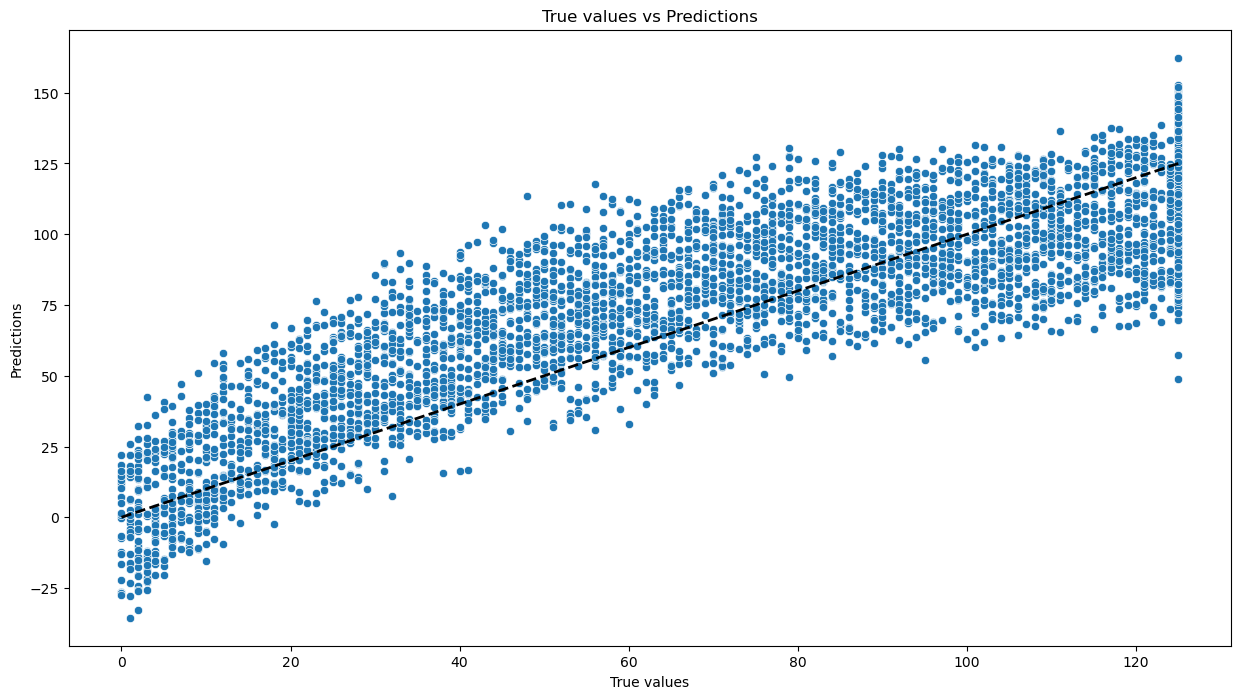

In [ ]:
# Plot true vs predicted values

y_pred = pipeline_linear_regression.predict(X_test)
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('True values vs Predictions')
plt.show()

### Elastic net

In [5]:
from sklearn.linear_model import ElasticNet

Defining the pipeline for the Elastic Net, using a StandardScaler as a scaler.

In [6]:
pipeline_elastic = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(random_state=42))
])

Defining the grid of hyperparameters for the elastic net,

In [ ]:
param_grid_elastic = {
    'elasticnet__alpha': np.logspace(-3, 3, 13),
    'elasticnet__l1_ratio': np.logspace(-3,3,13)
}

In [2]:
grid_search_elastic = GridSearchCV(estimator=pipeline_elastic, param_grid=param_grid_elastic,
                           cv=5, n_jobs=-1, verbose=0)
grid_search_elastic.fit(X_train, y_train)
print(f'Best hyperparameters: {grid_search_elastic.best_params_}')
best_elastic = grid_search_elastic.best_estimator_

Best hyperparameters: {'elasticnet__alpha': 0.0031622776601683794, 'elasticnet__l1_ratio': 0.001}


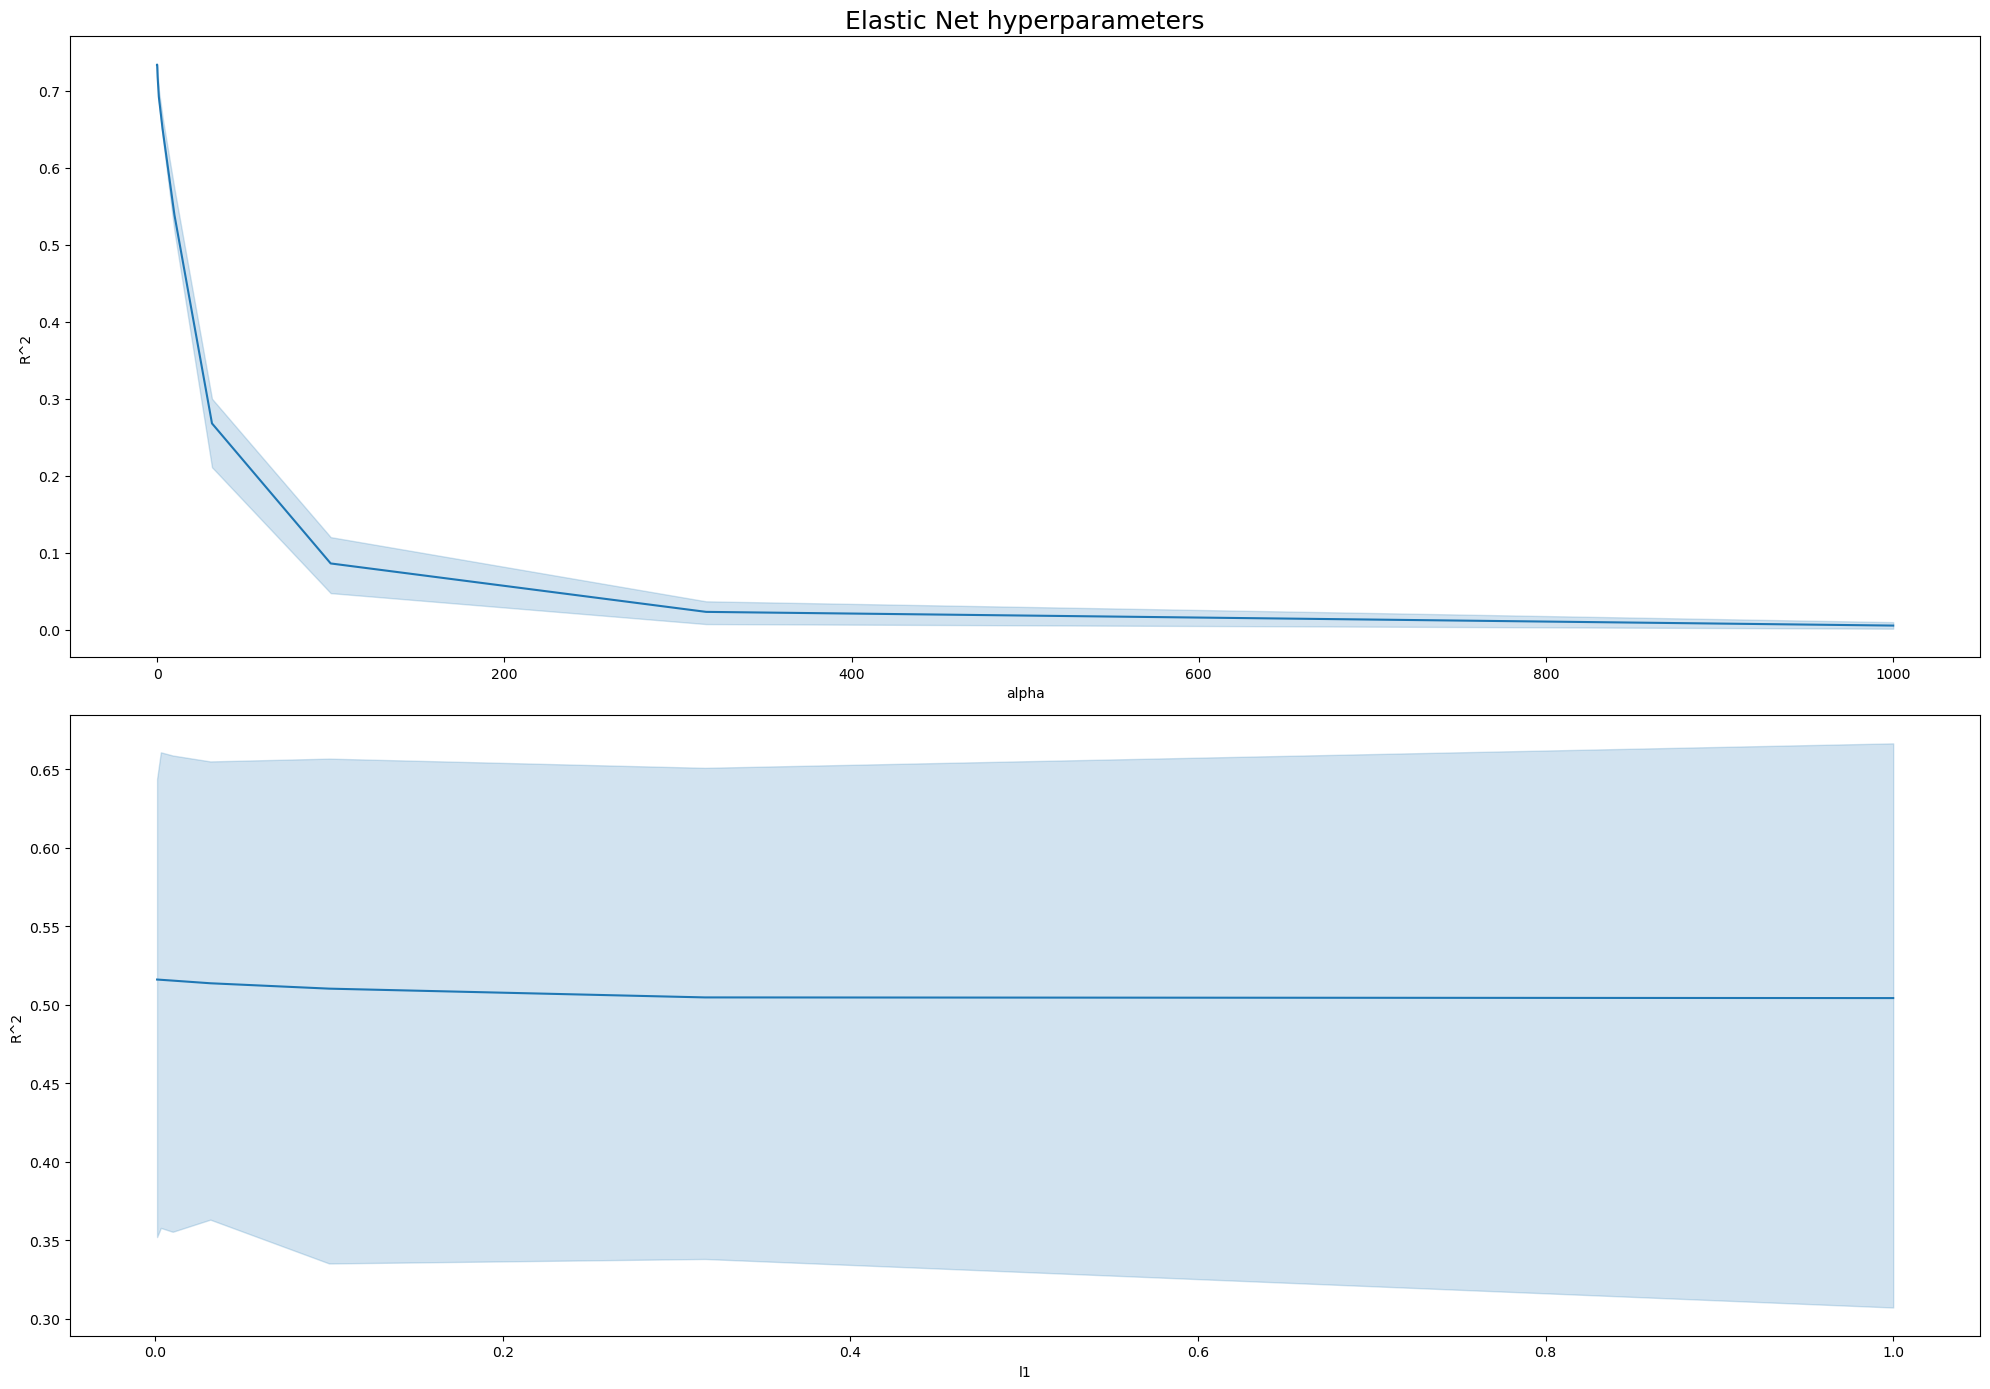

In [ ]:
# Plot hyperparameters evloution

elastic_results_df = pd.DataFrame(grid_search_elastic.cv_results_)
mean_test_score_elastic = elastic_results_df['mean_test_score']
param_alpha_elastic=elastic_results_df['param_elasticnet__alpha']
param_l1_elastic=elastic_results_df['param_elasticnet__l1_ratio']

params=[param_alpha_elastic, param_l1_elastic]
params_names=['alpha', 'l1']

plot_param_evolution(params,params_names,mean_test_score_elastic, 'Elastic Net')

In [ ]:
# Cross validation on train

elastic_scores = cross_validate(best_elastic, X_train, y_train, cv=5, scoring=scoring)
print('Metrics on train dataset')
train_score_df_elastic=print_scores(elastic_scores)
train_score_df_elastic

Metrics on train dataset


Score name      Scores
0      Mean Absolute Error   17.601887
1       Mean Squared Error  465.669440
2  Root Mean Squared Error   21.578104
3                      R^2    0.734140

In [ ]:
# Cross validation on test

elastic_scores_test = cross_validate(best_elastic, X_test, y_test, cv=5, scoring=scoring)
print('Metrics on test dataset')
test_score_df_elastic=print_scores(elastic_scores_test)
test_score_df_elastic

Metrics on test dataset


Score name      Scores
0      Mean Absolute Error   17.626028
1       Mean Squared Error  469.926759
2  Root Mean Squared Error   21.675358
3                      R^2    0.723073

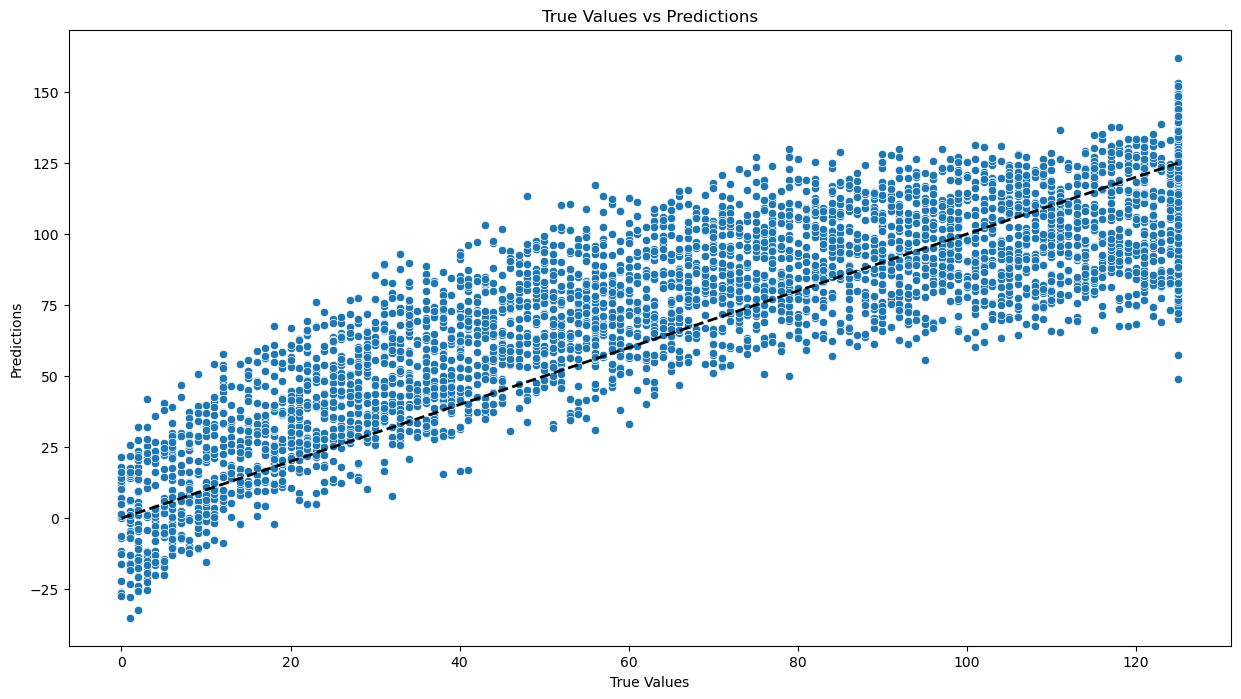

In [ ]:
# Plot true vs predicted values

y_pred = best_elastic.predict(X_test)
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

Elastic net and linear regression are super similar. it means that the parameters of the elastic net don't affect the model. The model is not overfitting.

### Regression tree

Defining the pipeline.

In [7]:
pipeline_reg_tree=Pipeline([
    ('scaler',MinMaxScaler()),
    ('regressor_tree',DecisionTreeRegressor(random_state=42))
])

Grid of params to perform the tuning for the regression tree.

In [ ]:
param_grid_reg_tree = {
    'regressor_tree__max_features': [None, 0.2, 0.4, 0.6, 0.8],
    'regressor_tree__max_depth': [None, 5, 10, 15, 20],
    'regressor_tree__min_samples_split': [2, 10, 20, 30],
    'regressor_tree__min_samples_leaf': [1, 2, 6, 10, 20]
}

Tuning of the hyperparams using GridSearchCV

In [ ]:
grid_search_reg_tree = GridSearchCV(pipeline_reg_tree, param_grid_reg_tree,
                           cv=5, n_jobs=-1, verbose=0, return_train_score=True)
grid_results_reg_tree=grid_search_reg_tree.fit(X_train, y_train)
print(f'Best hyperparameters: {grid_search_reg_tree.best_params_}')

Best hyperparameters: {'regressor_tree__max_depth': 10, 'regressor_tree__max_features': 0.6, 'regressor_tree__min_samples_leaf': 20, 'regressor_tree__min_samples_split': 2}


We can now plot the evolution of the params

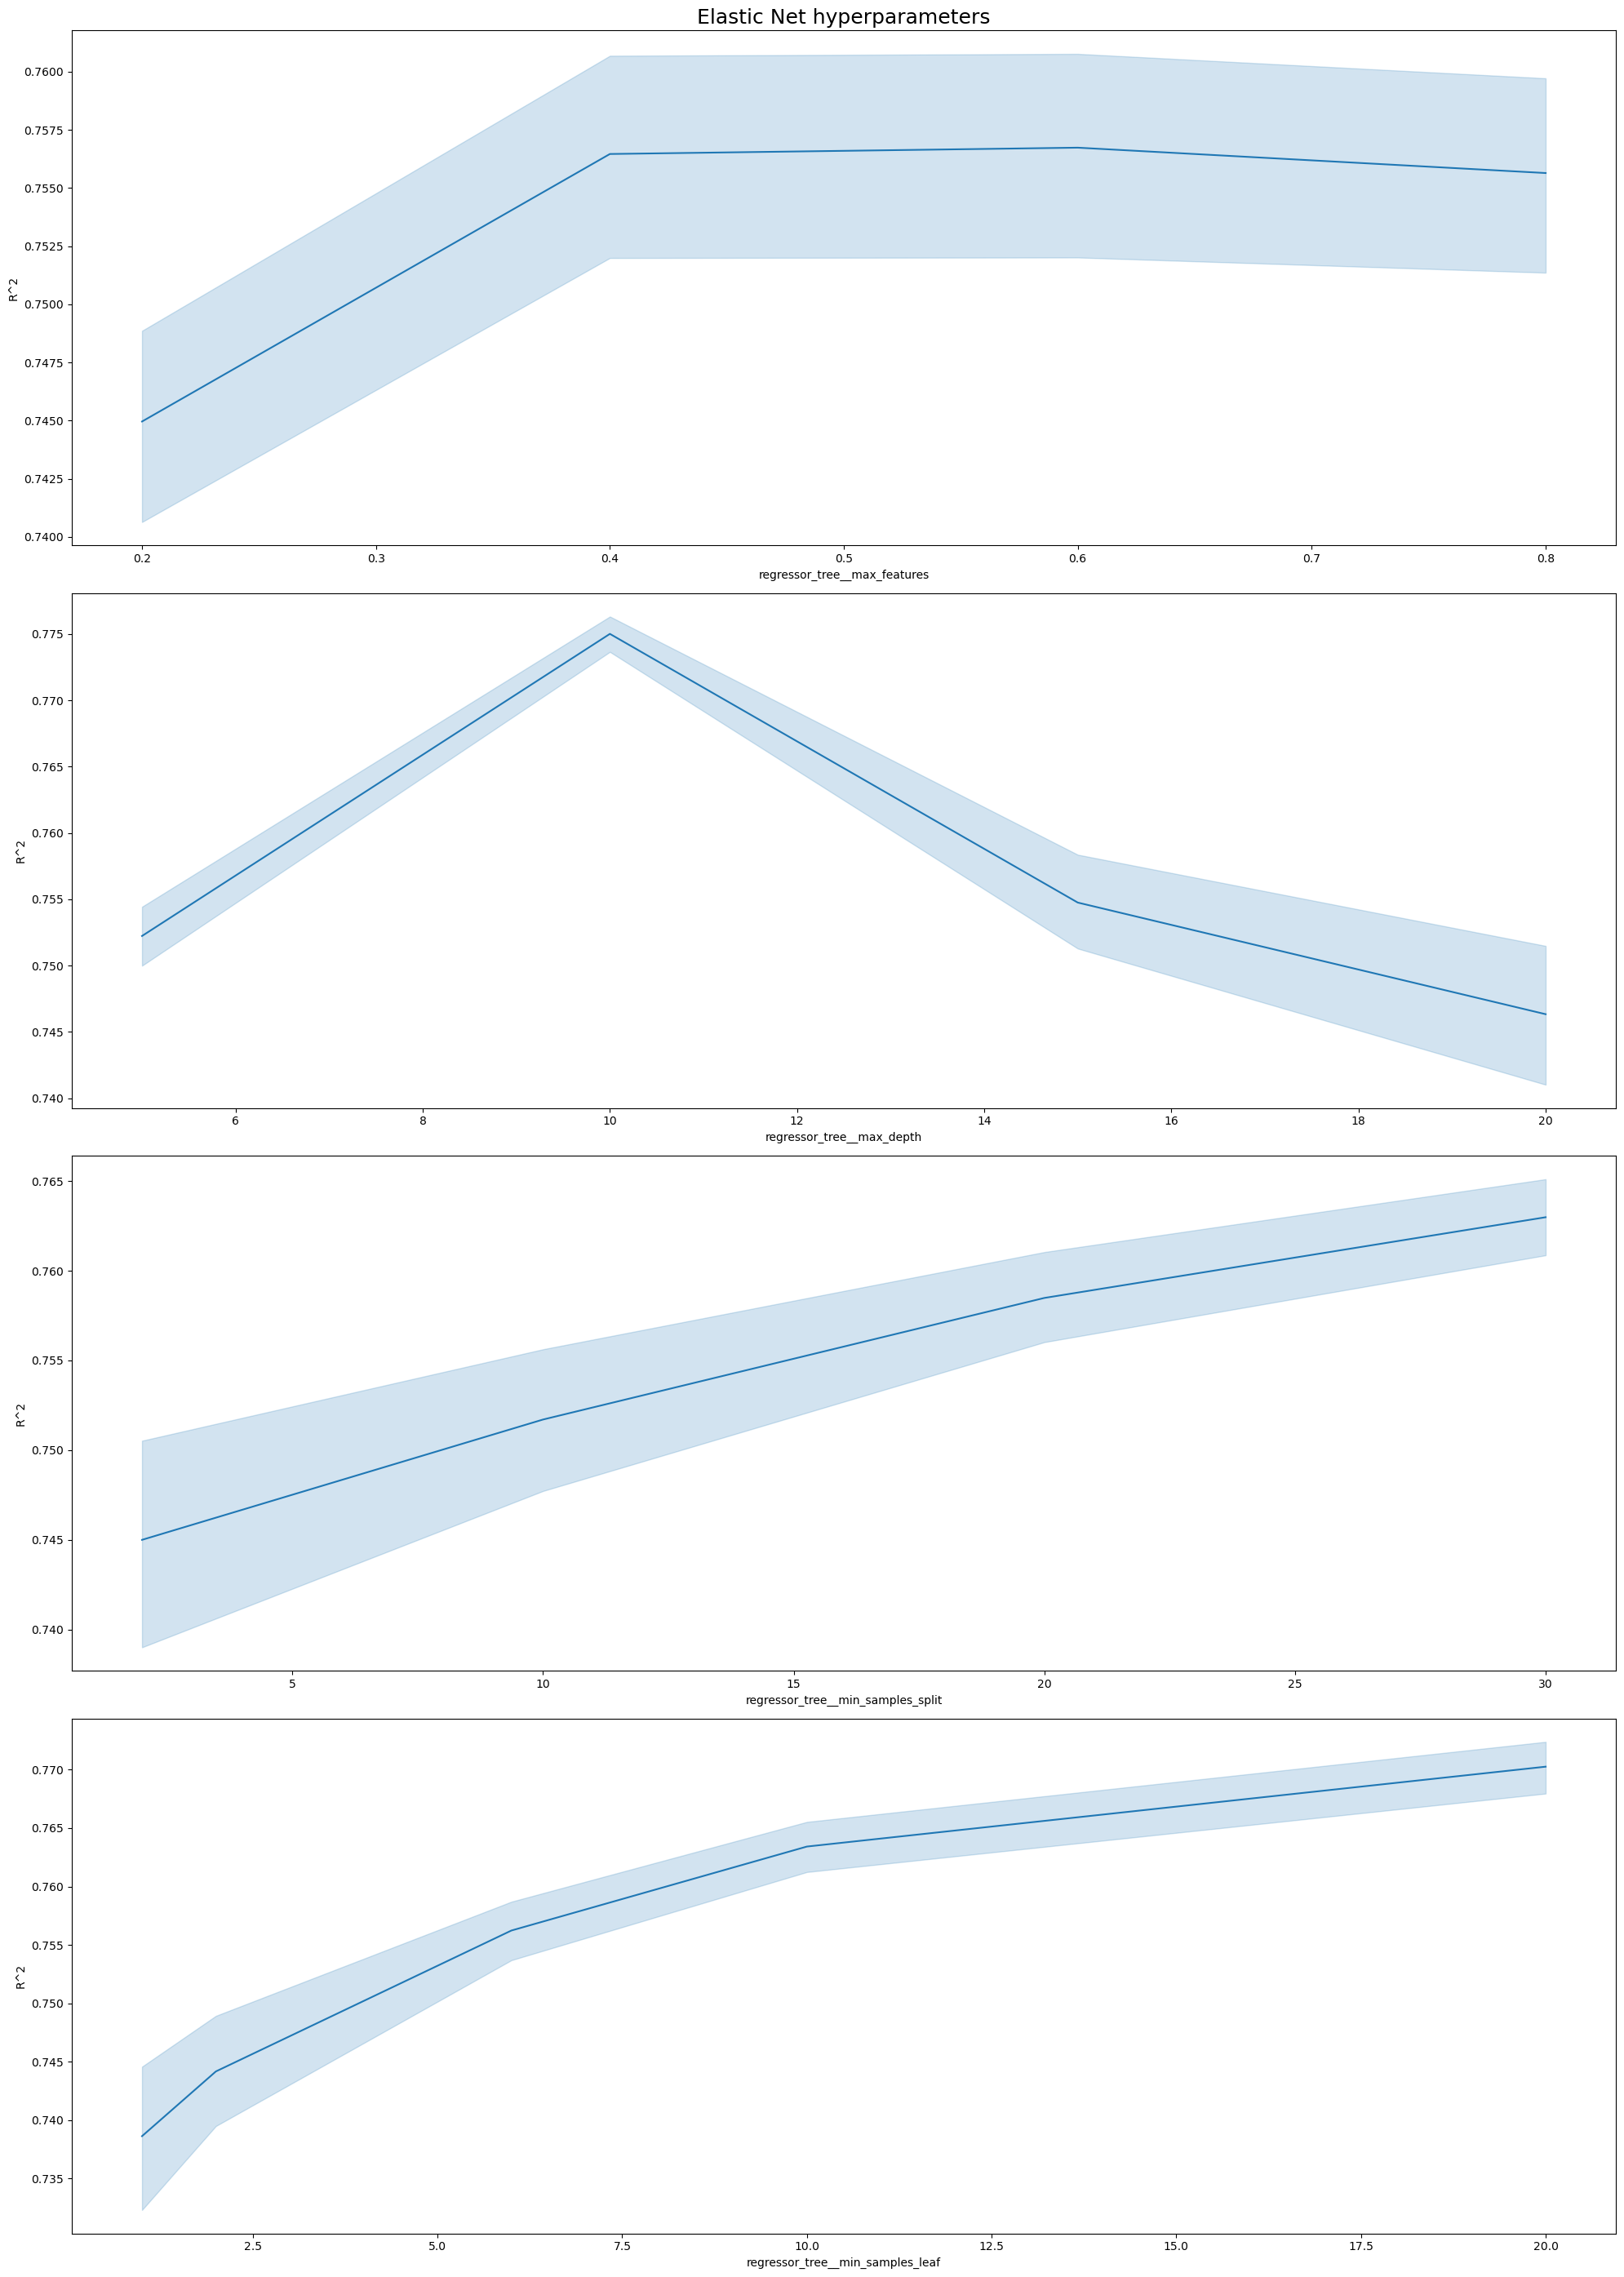

In [ ]:
params_reg_tree_df = pd.DataFrame(grid_results_reg_tree.cv_results_)
mean_test_score_reg_tree = params_reg_tree_df['mean_test_score']

params_reg_tree=[]

for param in list(grid_search_reg_tree.param_grid.keys()):
    params_reg_tree.append(params_reg_tree_df['param_'+param])


plot_param_evolution(params_reg_tree, list(grid_search_reg_tree.param_grid.keys()), mean_test_score_reg_tree, 'Elastic Net')

Let's calculate some scores on the train dataset

In [ ]:
# calculating the scores
best_regressor_tree = grid_search_reg_tree.best_estimator_
scoring=['neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2']
scores_reg_tree = cross_validate(best_regressor_tree, X_train, y_train, cv=10, scoring=scoring, n_jobs=-1)

# print the results
print('Metrics on train dataset')
train_score_df_reg_tree=print_scores(scores_reg_tree)
train_score_df_reg_tree

Metrics on train dataset


Score name      Scores
0      Mean Absolute Error   13.796193
1       Mean Squared Error  381.391882
2  Root Mean Squared Error   19.525832
3                      R^2    0.782013

And now let's calculate the score on the test dataset

In [ ]:
# calculating the scores
best_regressor_tree = grid_search_reg_tree.best_estimator_
scoring=['neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2']
scores_reg_tree_test = cross_validate(best_regressor_tree, X_test, y_test, cv=10, scoring=scoring, n_jobs=-1)

# print the results
print('Metrics on test dataset')
test_score_df_reg_tree=print_scores(scores_reg_tree_test)
test_score_df_reg_tree

Metrics on test dataset


Score name      Scores
0      Mean Absolute Error   14.267104
1       Mean Squared Error  412.059238
2  Root Mean Squared Error   20.292462
3                      R^2    0.756914

### SVM regressor

Defining the grid of the hyperparameters for the SVM regressor, without kernel because we want to compare different kernels.

In [ ]:
param_grid_SVR = {'svm__C': np.logspace(-2,2,6),
              'svm__gamma': np.logspace(-2,2,6)}

Trying different kernels

#### Linear

Creating the pipeline for the SVM regressor with the linear kernel.

In [ ]:
pipeline_SVR_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(kernel='linear'))
])
pipeline_SVR_linear

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVR(kernel='linear'))])

Hyperparameters tuning for linear SVM regressor.

In [9]:
linear_grid_search = GridSearchCV(pipeline_SVR_linear, param_grid_SVR, cv=5,n_jobs=-1, verbose=5, return_train_score=True)
linear_grid_results=linear_grid_search.fit(X_train, y_train)
print(f'Best hyperparameters: {linear_grid_search.best_params_}')
best_model_linear_SVR = linear_grid_results.best_estimator_

Best hyperparameters: {'svm__C': 0.3981071705534973, 'svm__gamma': 0.01}


Plotting the trajectory of the parameters.

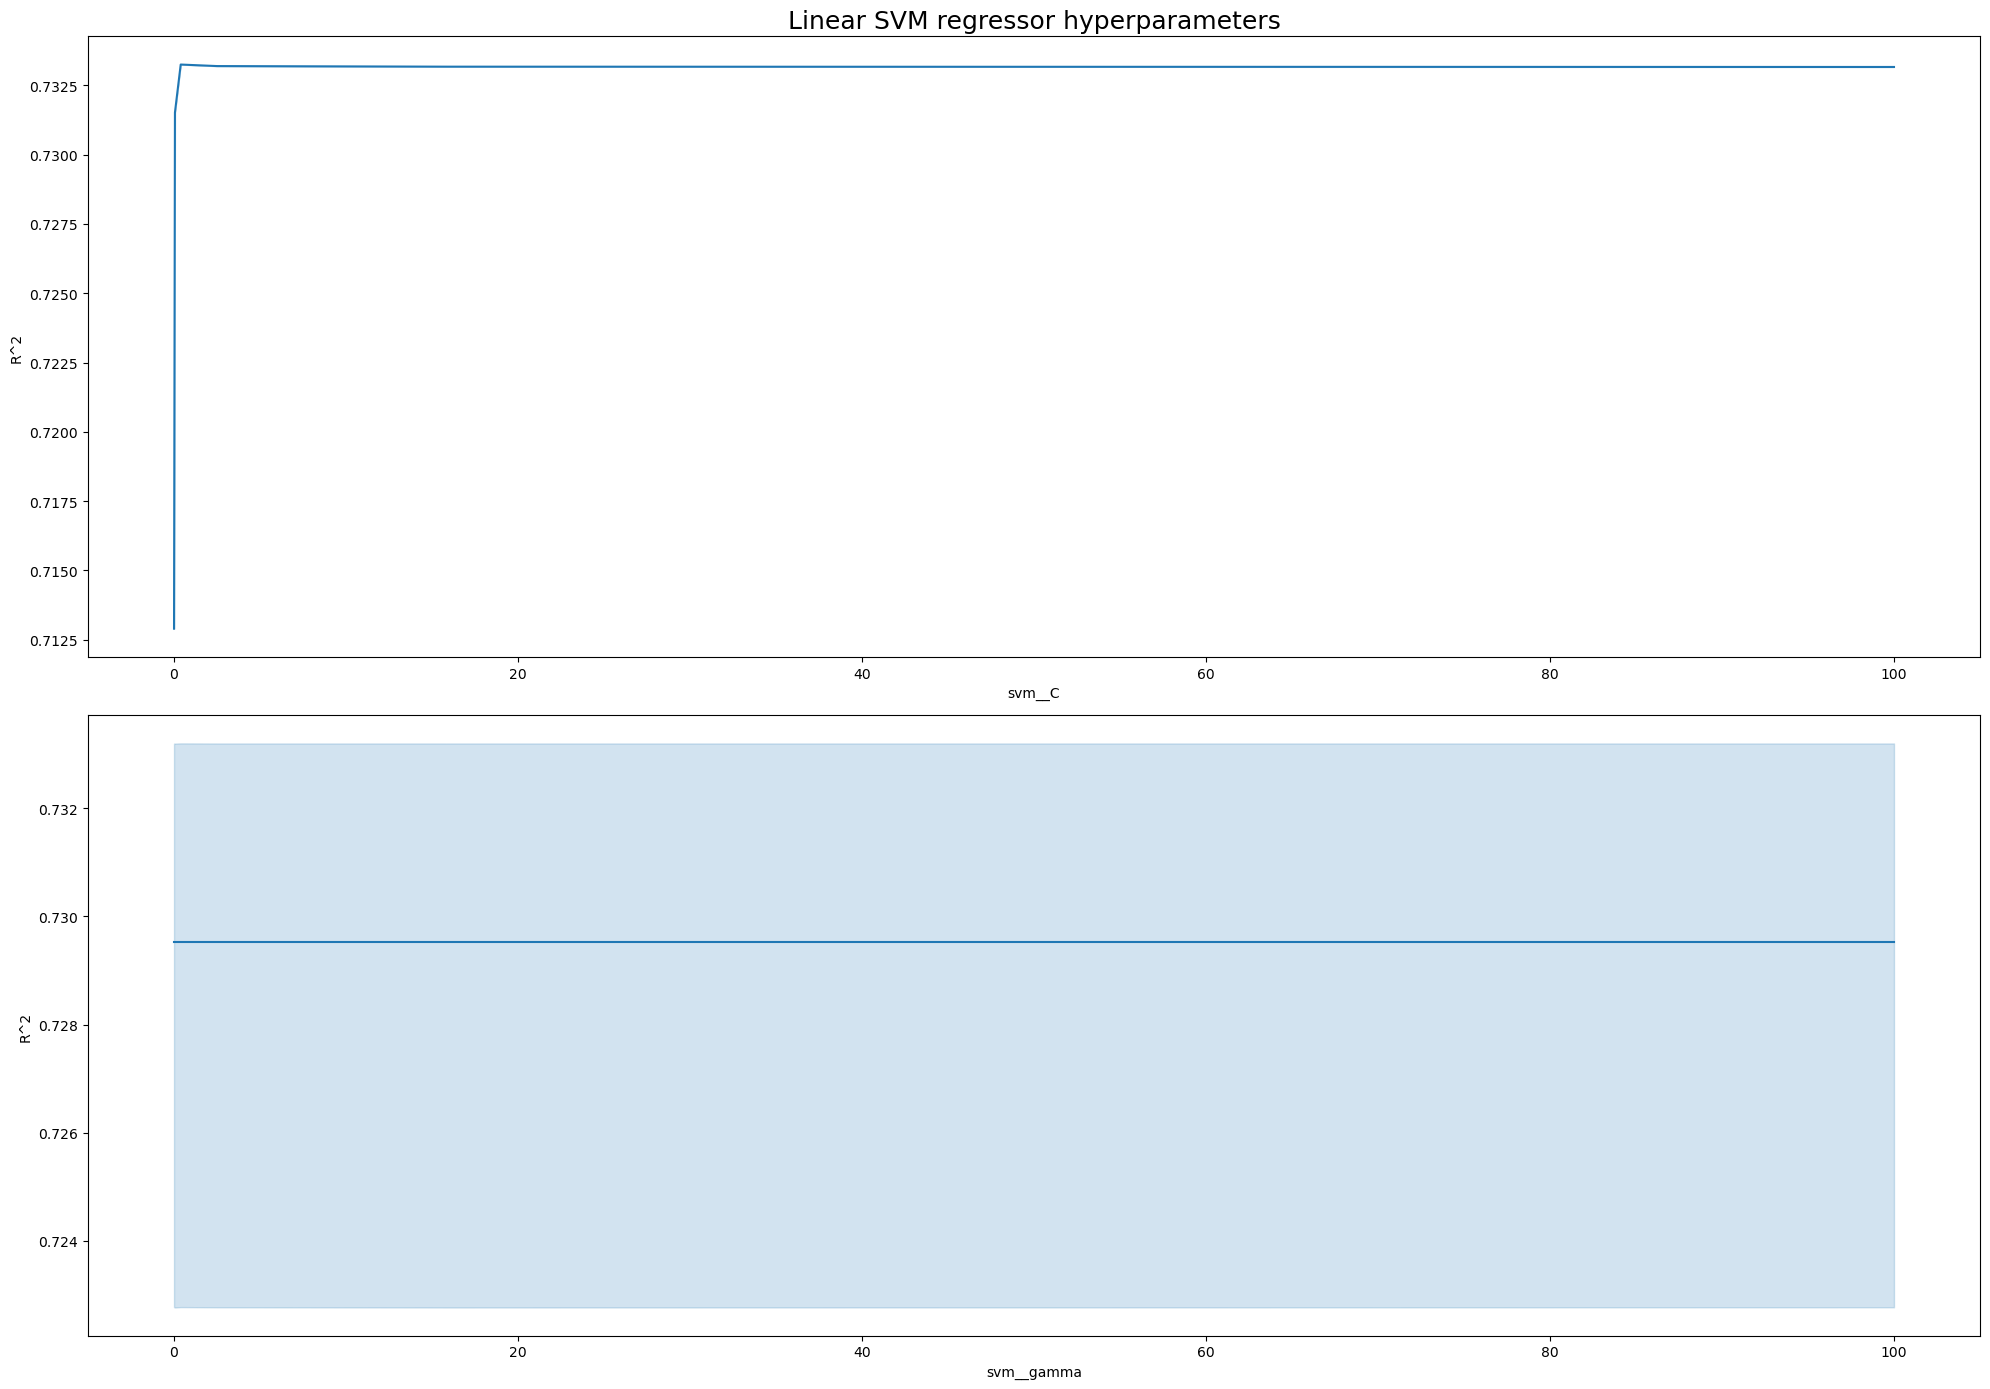

In [ ]:
params_SVR_linear_df = pd.DataFrame(linear_grid_results.cv_results_)
mean_test_score_SVR_linear = params_SVR_linear_df['mean_test_score']
linear_params=[]

for param in list(linear_grid_search.param_grid.keys()):
    linear_params.append(params_SVR_linear_df['param_'+param])

plot_param_evolution(linear_params, list(linear_grid_search.param_grid.keys()), mean_test_score_SVR_linear, 'Linear SVM regressor')

Creating a dataframe with the scores on the train dataset

In [ ]:
linear_SVR_scores=cross_validate(best_model_linear_SVR, X_train, y_train, cv=10, scoring=scoring, n_jobs=-1, verbose=0)
print('Metrics on train dataset')
train_score_df_linear_SVR=print_scores(linear_SVR_scores)
train_score_df_linear_SVR

Metrics on train dataset


Score name      Scores
0      Mean Absolute Error   17.573154
1       Mean Squared Error  467.138275
2  Root Mean Squared Error   21.611408
3                      R^2    0.733099

Creating a dataframe with the scores on the test dataset

In [ ]:
linear_SVR_scores_test=cross_validate(best_model_linear_SVR, X_test, y_test, cv=10, scoring=scoring, n_jobs=-1, verbose=0)
print('Metrics on train dataset')
test_score_df_linear_SVR=print_scores(linear_SVR_scores_test)
test_score_df_linear_SVR

Metrics on train dataset


Score name      Scores
0      Mean Absolute Error   17.607030
1       Mean Squared Error  471.065157
2  Root Mean Squared Error   21.693401
3                      R^2    0.722242

#### RBF

In [ ]:
pipeline_SVR_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(kernel='rbf'))
])
pipeline_SVR_rbf

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVR())])

Hyperparameters tuning for RBF SVM regressor

In [10]:
rbf_grid_search = grid_search = GridSearchCV(pipeline_SVR_rbf, param_grid_SVR, cv=5,n_jobs=-1, verbose=5, return_train_score=True)
rbf_grid_scores = rbf_grid_search.fit(X_train, y_train)
print(f'Best hyperparameters: {rbf_grid_search.best_params_}')
best_model_rbf_SVR=rbf_grid_search.best_estimator_

Best hyperparameters: {'svm__C': 100.0, 'svm__gamma': 2.5118864315095824}


We can now plot the evolution of the params

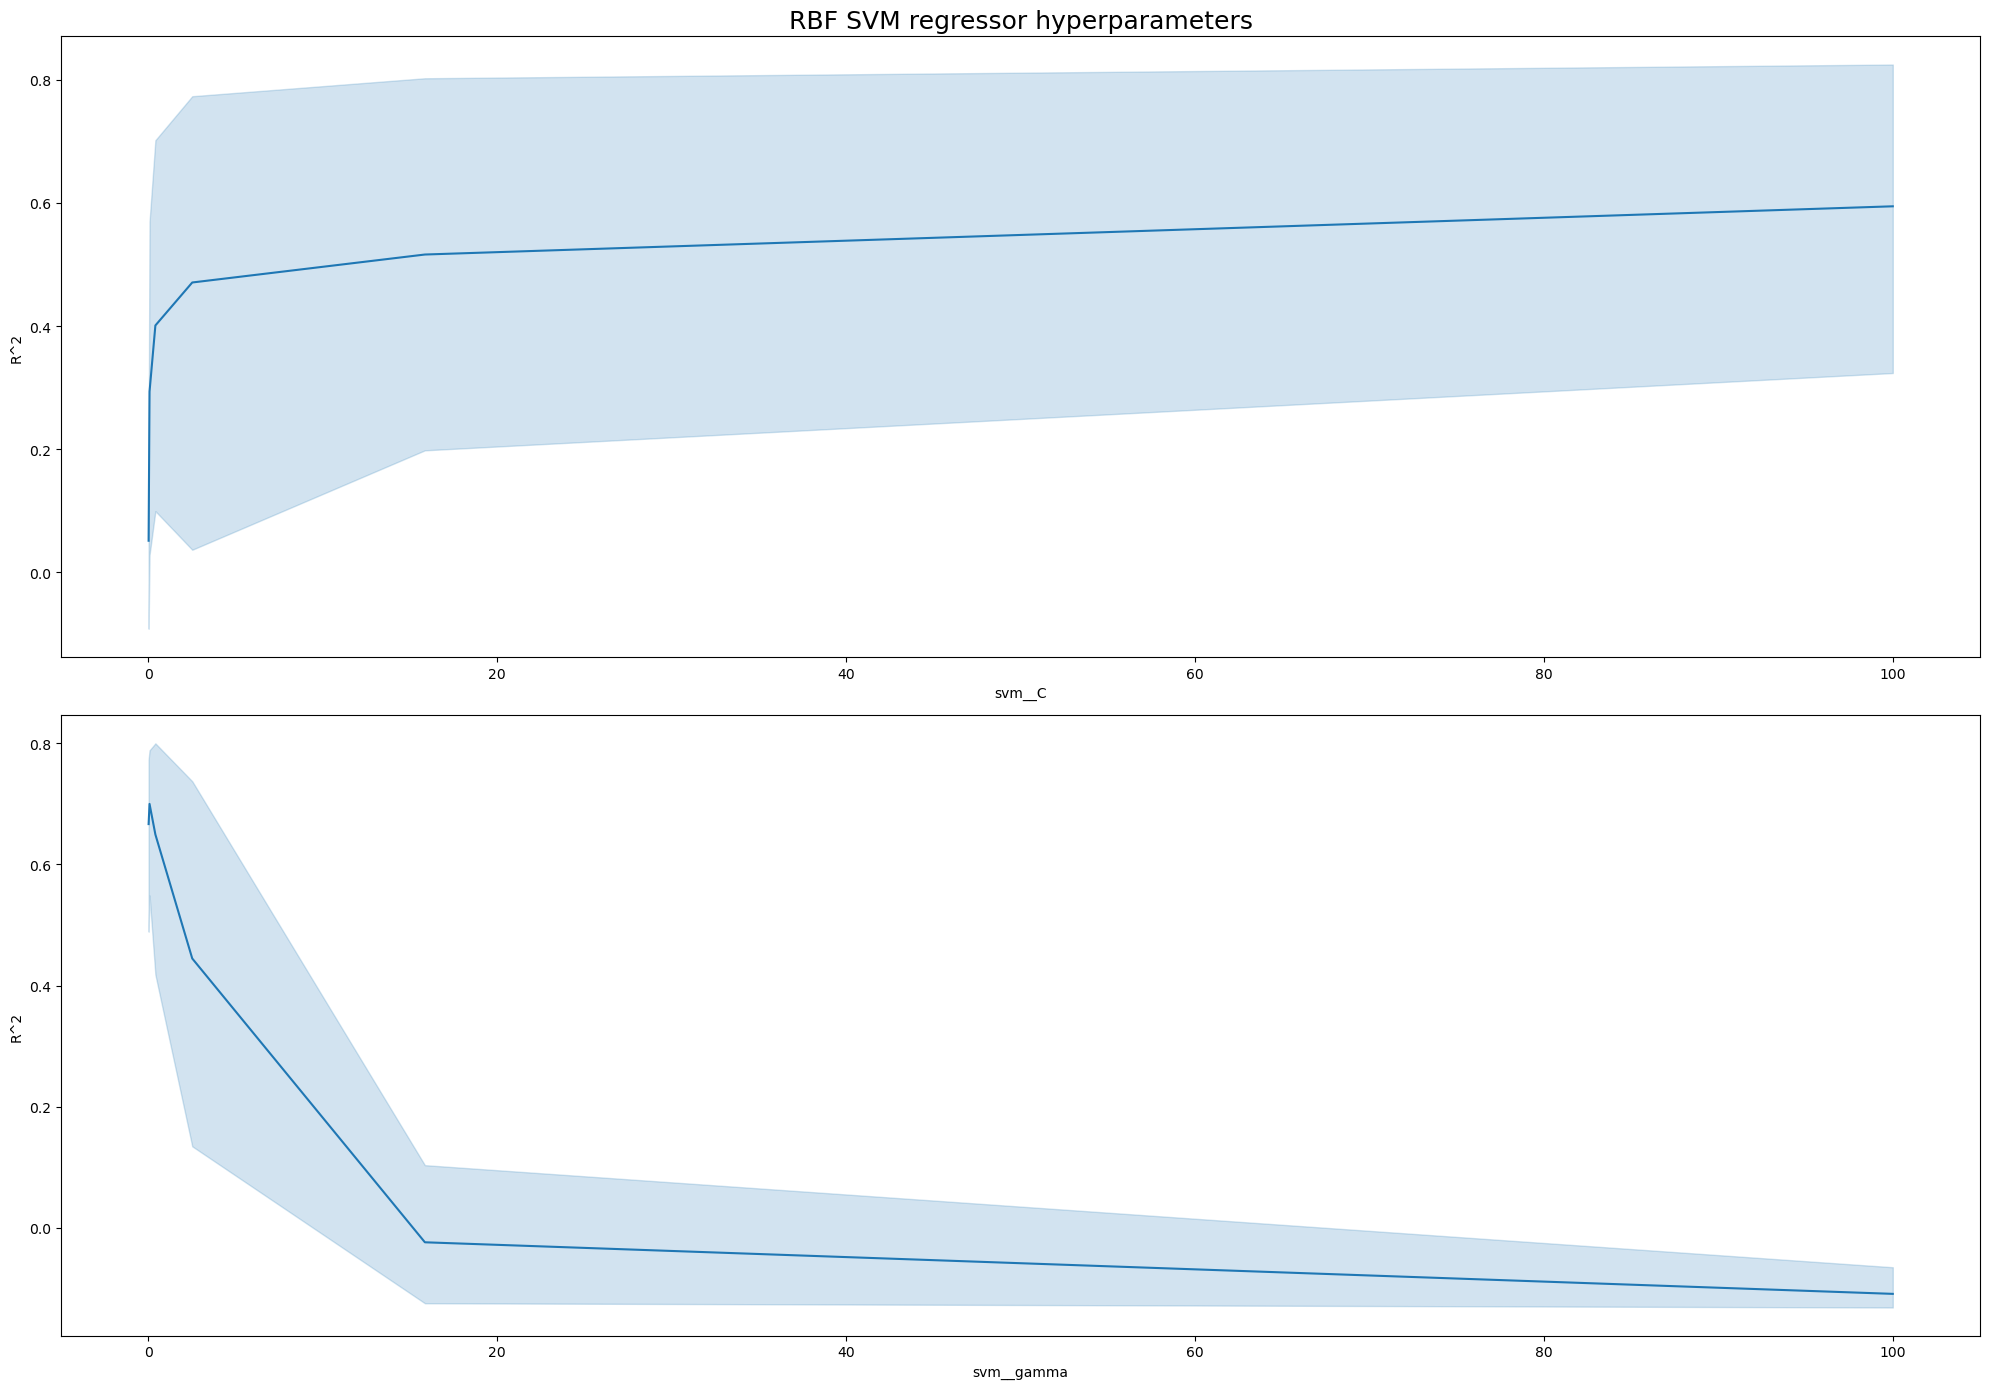

In [ ]:
params_SVR_rbf_df = pd.DataFrame(rbf_grid_scores.cv_results_)
mean_test_score_SVR_rbf = params_SVR_rbf_df['mean_test_score']
rbf_params=[]
rbf_param_names=list(rbf_grid_search.param_grid.keys())

for param in rbf_param_names:
    rbf_params.append(params_SVR_rbf_df['param_'+param])

plot_param_evolution(rbf_params, rbf_param_names, mean_test_score_SVR_rbf, 'RBF SVM regressor')

In [ ]:
# Cross validation on train

rbf_scores=cross_validate(best_model_rbf_SVR, X_train, y_train, cv=10, scoring=scoring, n_jobs=-1, verbose=0)
print('Metrics on train dataset')
train_score_df_rbf_SVR=print_scores(rbf_scores)
train_score_df_rbf_SVR

Metrics on train dataset


Score name      Scores
0      Mean Absolute Error   10.274906
1       Mean Squared Error  228.587134
2  Root Mean Squared Error   15.114089
3                      R^2    0.869467

In [ ]:
# Cross validation on test

rbf_scores_test=cross_validate(best_model_rbf_SVR, X_test, y_test, cv=10, scoring=scoring, n_jobs=-1, verbose=0)
print('Metrics on train dataset')
test_score_df_rbf_SVR=print_scores(rbf_scores_test)
test_score_df_rbf_SVR

Metrics on train dataset


Score name      Scores
0      Mean Absolute Error   13.061947
1       Mean Squared Error  336.887247
2  Root Mean Squared Error   18.345807
3                      R^2    0.801372

### Random forest

Defining the pipeline for the random forest, with oob_score active to record the oob_score of the best model.

In [ ]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(random_state=42, oob_score=True, warm_start=True))
])

Defining the random forest `param_grid` for the hyperparameters tuning. We will use 3 parameters, `max_features`, `n_estimators` and `max_depth`, as they are important parameters for the random forest model.

In [ ]:
param_grid_rf = {
    'random_forest__max_features': range(2, X.shape[1]+1, 2),
    'random_forest__n_estimators': range(100, 320, 20),
    'random_forest__max_depth': [10, 15, 20]
}

In [ ]:
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=5)
grid_search_rf.fit(X_train, y_train)
print(f'Best hyperparameters: {grid_search_rf.best_params_}')
#Best hyperparameters: {'random_forest__max_depth': 20, 'random_forest__max_features': 10, 'random_forest__n_estimators': 300}

Best hyperparameters: {'random_forest__max_depth': 20, 'random_forest__max_features': 10, 'random_forest__n_estimators': 300}


We can now plot the evolution of the params

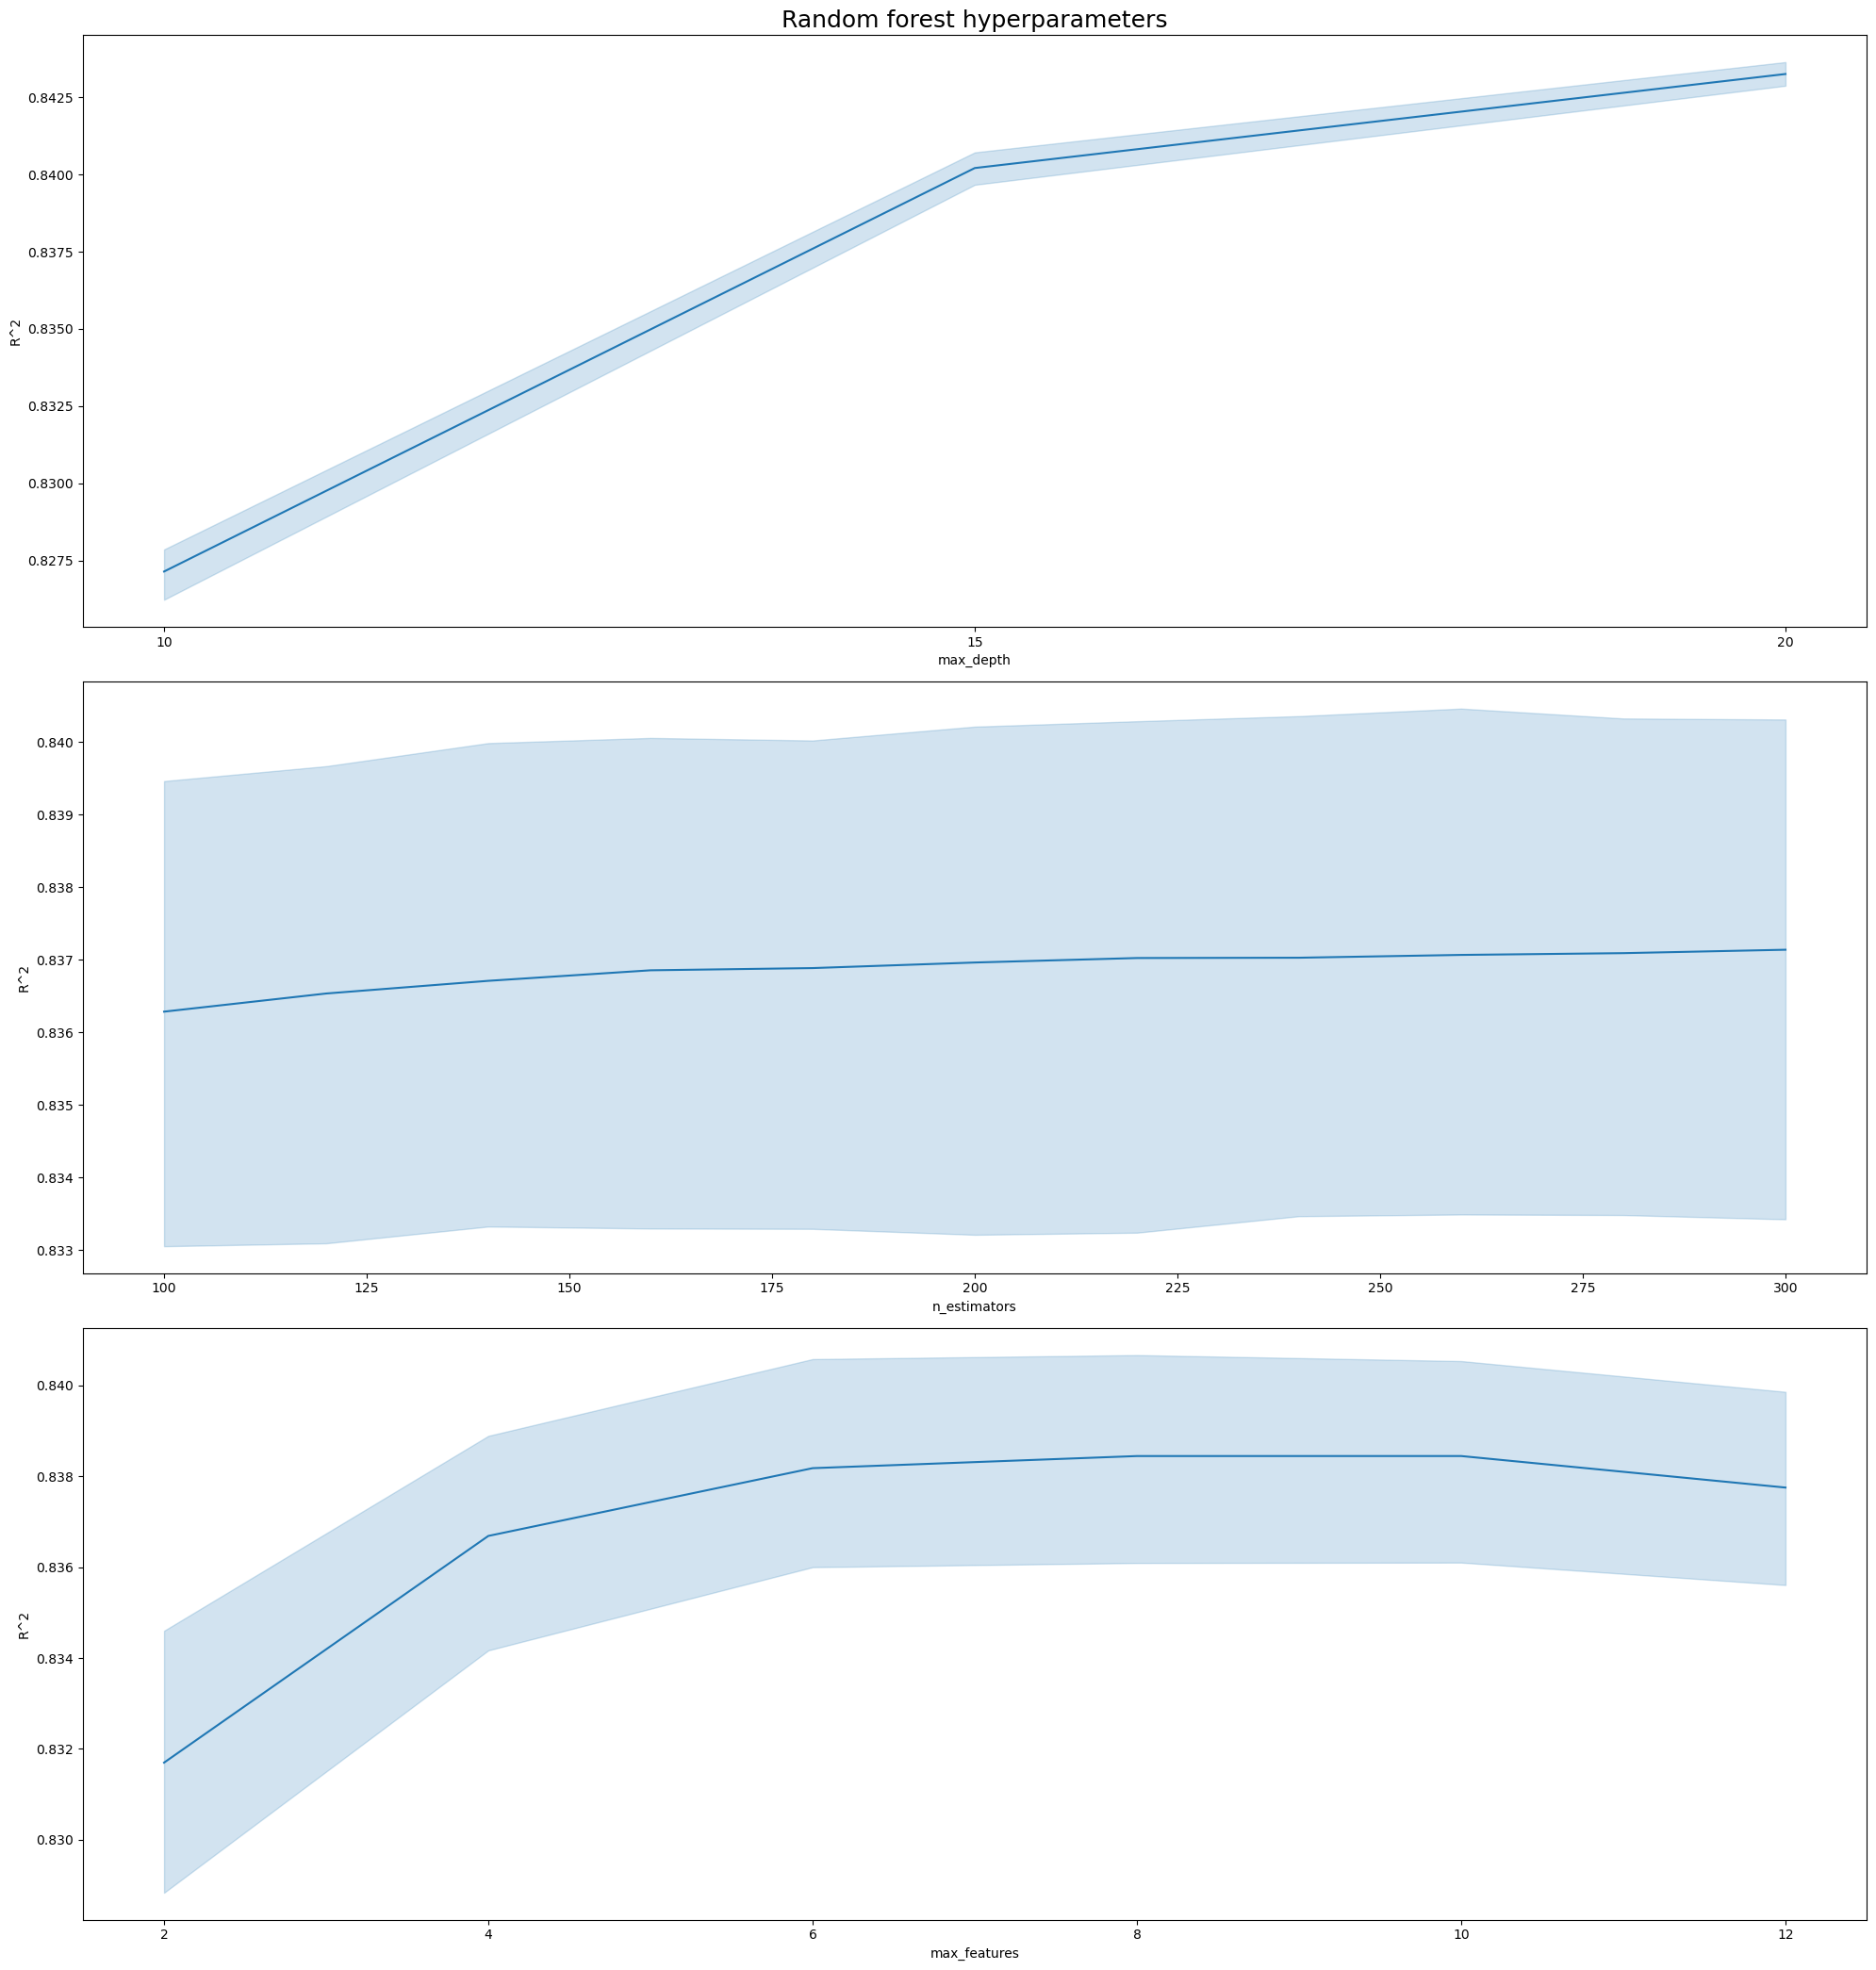

In [ ]:
rf_results_df = pd.DataFrame(grid_search_rf.cv_results_)
#rf_results_df.to_csv('/dfs/results_rf_grid_search.csv', index=False)

# extract params
param_max_depth = rf_results_df['param_random_forest__max_depth'].astype(str)
param_n_estimators = rf_results_df['param_random_forest__n_estimators']
param_max_feature = rf_results_df['param_random_forest__max_features']
mean_test_score_rf = rf_results_df['mean_test_score']

params_rf=[param_max_depth, param_n_estimators, param_max_feature]
params_names_rf=['max_depth', 'n_estimators', 'max_features']

# plotting
plot_param_evolution(params_rf, params_names_rf, mean_test_score_rf, 'Random forest')


In [ ]:
# Cross validation on train

best_rf=grid_search_rf.best_estimator_
rf_results = cross_validate(best_rf, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
print('Metrics on train dataset')
train_score_df_rf=print_scores(rf_results)
train_score_df_rf

Metrics on train dataset


Score name      Scores
0      Mean Absolute Error   11.810811
1       Mean Squared Error  271.667400
2  Root Mean Squared Error   16.480202
3                      R^2    0.844899

In [ ]:
# Cross validation on test

rf_results_test = cross_validate(best_rf, X_test, y_test, cv=5, scoring=scoring, n_jobs=-1)
print('Metrics on train dataset')
test_score_df_rf=print_scores(rf_results_test)
test_score_df_rf

Metrics on train dataset


Score name      Scores
0      Mean Absolute Error   12.903912
1       Mean Squared Error  314.805370
2  Root Mean Squared Error   17.742201
3                      R^2    0.814414

Let's see the out of bag score

In [ ]:
oob_score = best_rf.named_steps['random_forest'].oob_score_
print(f'OOB Score: {oob_score}')

OOB Score: 0.848952561694114


We can analyze the feature importance

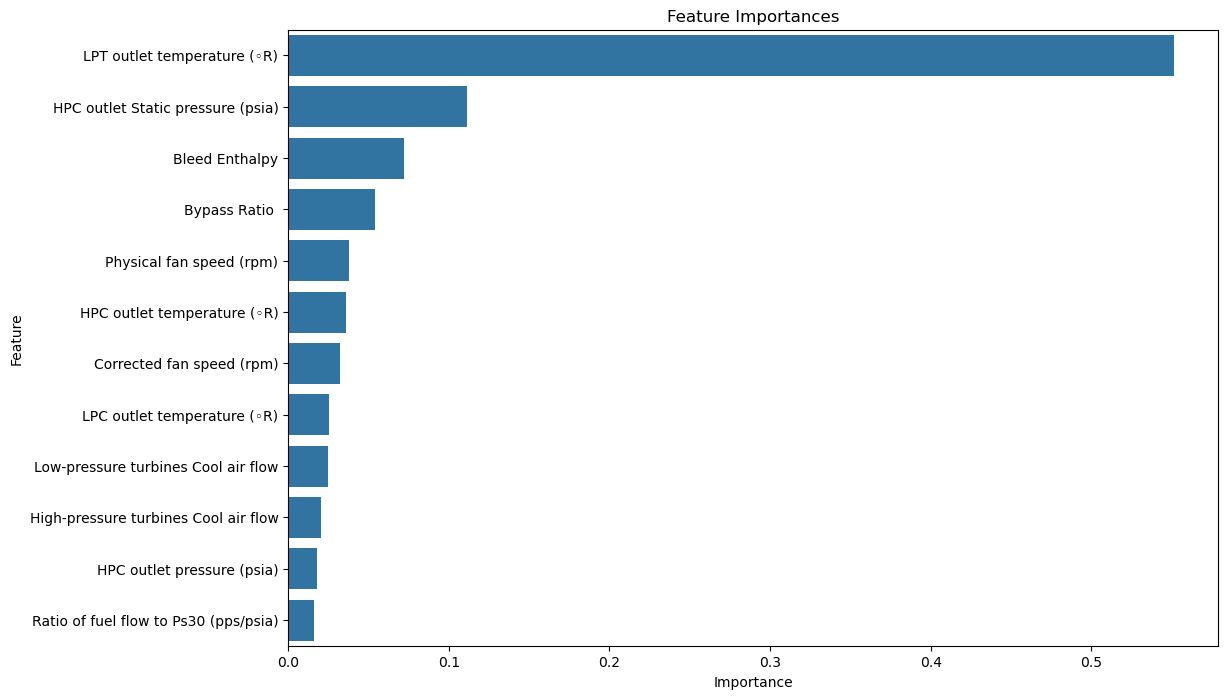

Feature  Importance
2             LPT outlet temperature (◦R)    0.551379
5       HPC outlet Static pressure (psia)    0.111149
9                          Bleed Enthalpy    0.072077
8                           Bypass Ratio     0.054095
4                Physical fan speed (rpm)    0.037952
1             HPC outlet temperature (◦R)    0.036101
7               Corrected fan speed (rpm)    0.032354
0             LPC outlet temperature (◦R)    0.025572
11    Low-pressure turbines Cool air flow    0.025080
10   High-pressure turbines Cool air flow    0.020524
3              HPC outlet pressure (psia)    0.017905
6   Ratio of fuel flow to Ps30 (pps/psia)    0.015812

In [ ]:
feature_importances = best_rf.named_steps['random_forest'].feature_importances_
features = X.columns

importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.show()

importances_df



### Neural Network

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                416       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


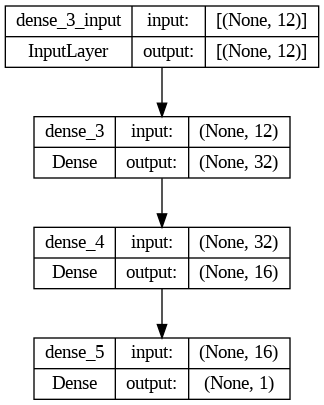

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout
from keras.optimizers import Adam
import tensorflow.keras.backend as K

# Define R squared function
def r_squared(y_true, y_pred):
    y_true = K.cast(y_true, y_pred.dtype)
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

# Define model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error', r_squared])
model.summary()
tf.keras.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [ ]:
# Train the model

history_callback = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    epochs = 250,
    validation_split=.1,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='mean_squared_error', mode='min', patience=20, restore_best_weights=True),
    ]
)

Epoch 1/250
813/813 [==============================] - 3s 2ms/step - loss: 2862.1404 - mean_squared_error: 2862.1404 - mean_absolute_error: 40.8636 - r_squared: -0.7717 - val_loss: 1904.4867 - val_mean_squared_error: 1904.4867 - val_mean_absolute_error: 39.5480 - val_r_squared: -0.3782
Epoch 2/250
813/813 [==============================] - 2s 3ms/step - loss: 1813.4728 - mean_squared_error: 1813.4728 - mean_absolute_error: 37.1582 - r_squared: -0.1271 - val_loss: 2480.4878 - val_mean_squared_error: 2480.4878 - val_mean_absolute_error: 36.9743 - val_r_squared: -0.4959
Epoch 3/250
813/813 [==============================] - 2s 3ms/step - loss: 1849.2091 - mean_squared_error: 1849.2091 - mean_absolute_error: 37.3867 - r_squared: -0.1622 - val_loss: 2447.2642 - val_mean_squared_error: 2447.2642 - val_mean_absolute_error: 36.9769 - val_r_squared: -0.4766
Epoch 4/250
813/813 [==============================] - 2s 2ms/step - loss: 1876.9968 - mean_squared_error: 1876.9968 - mean_absolute_error:

Plot metrics

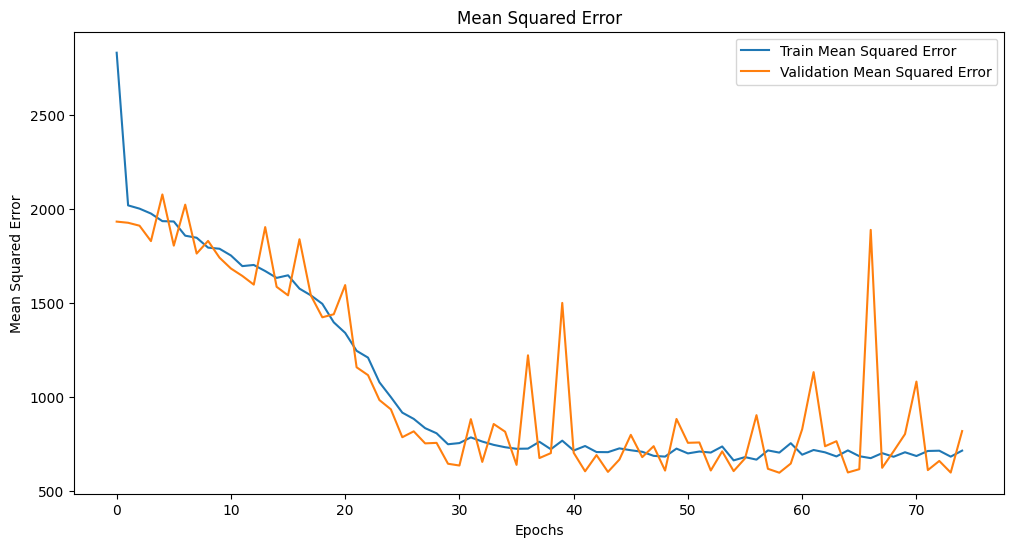

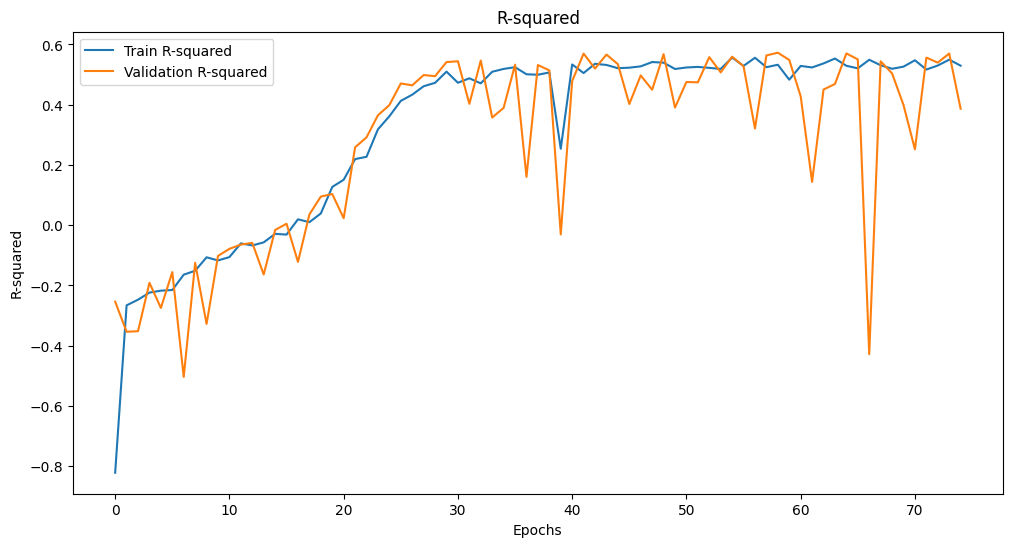

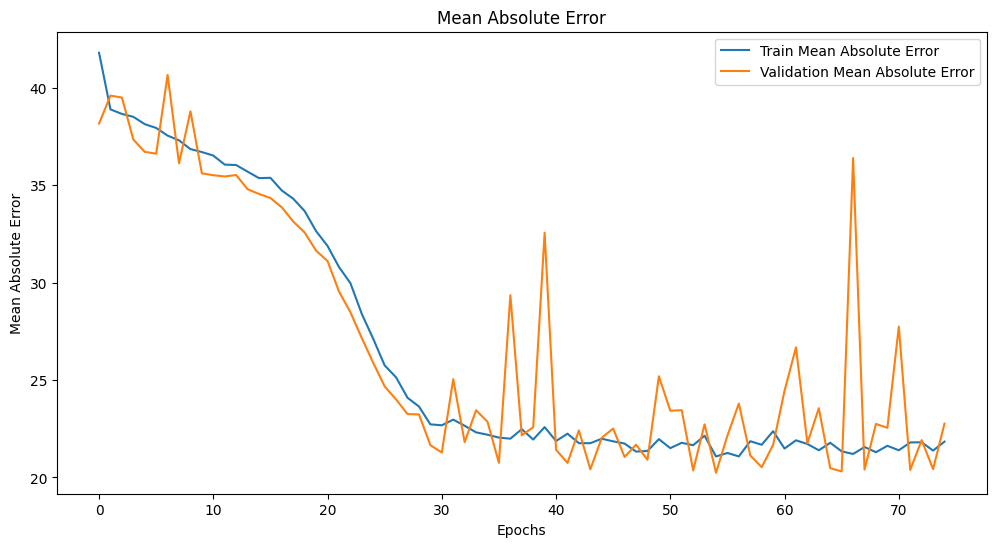

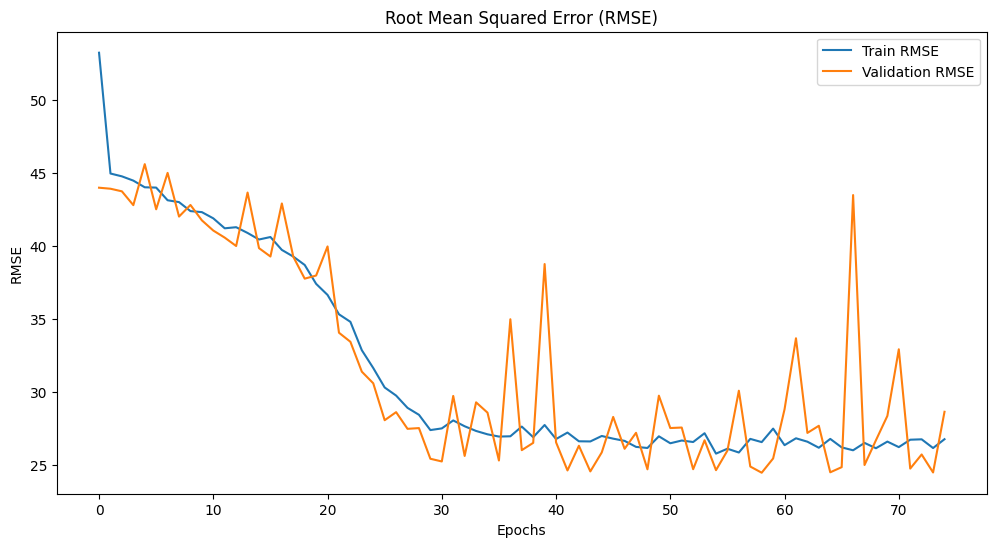

In [ ]:
history_df = pd.DataFrame(history_callback.history)

# Plot Mean Squared Error
plt.figure(figsize=(12, 6))
plt.plot(history_df['mean_squared_error'], label='Train Mean Squared Error')
plt.plot(history_df['val_mean_squared_error'], label='Validation Mean Squared Error')
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Plot R-squared
plt.figure(figsize=(12, 6))
plt.plot(history_df['r_squared'], label='Train R-squared')
plt.plot(history_df['val_r_squared'], label='Validation R-squared')
plt.title('R-squared')
plt.xlabel('Epochs')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# Plot Mean Absolute Error
plt.figure(figsize=(12, 6))
plt.plot(history_df['mean_absolute_error'], label='Train Mean Absolute Error')
plt.plot(history_df['val_mean_absolute_error'], label='Validation Mean Absolute Error')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

history_df['rmse'] = history_df['mean_squared_error'].apply(np.sqrt)
history_df['val_rmse'] = history_df['val_mean_squared_error'].apply(np.sqrt)

# Plot Root Mean Squared Error (RMSE)
plt.figure(figsize=(12, 6))
plt.plot(history_df['rmse'], label='Train RMSE')
plt.plot(history_df['val_rmse'], label='Validation RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
# Evaluate on train

eval_tr = model.evaluate(X_train, y_train)

mse_index = model.metrics_names.index('mean_squared_error')
r2_index = model.metrics_names.index('r_squared')
mae_index=model.metrics_names.index('mean_absolute_error')

mae_scores_nn=eval_tr[mae_index]
mse_scores_nn = eval_tr[mse_index]
r2_scores_nn = eval_tr[r2_index]
rmse_scores_nn = np.sqrt(mse_scores_nn)

print('MSE: ' + str(np.mean(mse_scores_nn)))
print('RMSE: ' + str(np.mean(rmse_scores_nn)))
print('R²: ' + str(np.mean(r2_scores_nn)))
print('MAE: ' + str(np.mean(mae_scores_nn)))

452/452 [==============================] - 1s 2ms/step - loss: 572.4982 - mean_squared_error: 572.4982 - mean_absolute_error: 19.4443 - r_squared: 0.6500
MSE: 572.4981689453125
RMSE: 23.926933964578758
R²: 0.6500096917152405
MAE: 19.44430160522461


In [ ]:
m=['Mean Absolute Error', 'Mean Squared Error','Root Mean Squared Error', 'R^2']
val=[mae_scores_nn, mse_scores_nn, rmse_scores_nn, r2_scores_nn]
train_score_df_nn=pd.DataFrame({'Score name':m, 'Scores':val})
train_score_df_nn

Score name       Score
0      Mean Absolute Error   19.444302
1       Mean Squared Error  572.498169
2  Root Mean Squared Error   23.926934
3                      R^2    0.650010

In [ ]:
# Evaluate on test

eval_ts = model.evaluate(X_test, y_test)

mse_index = model.metrics_names.index('mean_squared_error')
r2_index = model.metrics_names.index('r_squared')
mae_index=model.metrics_names.index('mean_absolute_error')

mae_score_nn=eval_ts[mae_index]
mse_score_nn = eval_ts[mse_index]
r2_score_nn = eval_ts[r2_index]
rmse_score_nn = np.sqrt(mse_scores_nn)

print('MSE: ' + str(np.mean(mse_score_nn)))
print('RMSE: ' + str(np.mean(rmse_score_nn)))
print('R²: ' + str(np.mean(r2_score_nn)))
print('MAE: ' + str(np.mean(mae_score_nn)))

194/194 [==============================] - 1s 4ms/step - loss: 581.1396 - mean_squared_error: 581.1396 - mean_absolute_error: 19.5918 - r_squared: 0.6296
MSE: 581.1396484375
RMSE: 24.10683820905388
R²: 0.6295886635780334
MAE: 19.591793060302734


In [ ]:
m=['Mean Absolute Error', 'Mean Squared Error','Root Mean Squared Error', 'R^2']
val=[mae_score_nn, mse_score_nn, rmse_score_nn, r2_score_nn]
test_score_df_nn=pd.DataFrame({'Score name':m, 'Scores':val})
test_score_df_nn

Score name       Score
0      Mean Absolute Error   19.591793
1       Mean Squared Error  581.139648
2  Root Mean Squared Error   24.106838
3                      R^2    0.629589

# Results


In [ ]:
def merge_scores(dataframes, models):
  score_names=train_score_df_linear['Score name']
  results_df=pd.DataFrame({'Score name':score_names.values})

  for i,df in enumerate(dataframes):
    if 'Score'+str(i) not in results_df.columns.values:
      suffix= (i, i+1)
    else:
      suffix=None
    results_df=results_df.merge(df, on='Score name', how='left', suffixes=suffix)

  metric_names=results_df['Score name'].values
  results_df=results_df.drop(columns=['Score name'])

  col=dict()
  for s in range(0, len(dataframes)):
    col[results_df.columns[s]]=models[s]

  return results_df.rename(columns=col).set_index(metric_names)

Definitions of the used models

In [ ]:
models = [
    'Linear Regression',
    'Elastic Net',
    'Regression Tree',
    'SVM regression - linear',
    'SVM regression - rbf',
    'Random forest',
    'Neural network'
    ]

Definition of the train dataset scores.

In [ ]:
train_dataframes = [
    train_score_df_linear,
    train_score_df_elastic,
    train_score_df_reg_tree,
    train_score_df_linear_SVR,
    train_score_df_rbf_SVR,
    train_score_df_rf,
    train_score_df_nn
]

Definition of the test dataset scores.

In [ ]:
test_dataframes = [
    test_score_df_linear,
    test_score_df_elastic,
    test_score_df_reg_tree,
    test_score_df_linear_SVR,
    test_score_df_rbf_SVR,
    test_score_df_rf,
    test_score_df_nn
]

Definition of a single dataset of all train scores.

In [ ]:
# create the dataframe from the variables in the notebook
scores_train=merge_scores(train_dataframes, models)

# import the dataset from a csv file
#scores_train=pd.read_csv('dfs/train_scores.csv', index_col=0)

scores_train

Linear Regression  Elastic Net  Regression Tree  \
Mean Absolute Error              17.598501    17.602444        13.796193   
Mean Squared Error              465.503219   465.727535       381.391882   
Root Mean Squared Error          21.573578    21.579425        19.525832   
R^2                               0.734031     0.734107         0.782013   

                         SVM regression - linear  SVM regression - rbf  \
Mean Absolute Error                    17.573154             10.274906   
Mean Squared Error                    467.138275            228.587134   
Root Mean Squared Error                21.611408             15.114089   
R^2                                     0.733099              0.869467   

                         Random forest  Neural network  
Mean Absolute Error          11.810811       19.444302  
Mean Squared Error          271.667400      572.498169  
Root Mean Squared Error      16.480202       23.926934  
R^2                           0.844899        0.650010

Save the score dataframe into a csv file.

In [ ]:
scores_train.to_csv('../dfs/train_scores.csv', index=True)

Definition of a single dataset of all test scores, or calculating it using notebook variables, or reading from a previous run of the notebook

In [ ]:
# create the df from the variables in the notebook
scores_test=merge_scores(test_dataframes, models)

# import the dataset from a csv file
#scores_test=pd.read_csv('dfs/test_scores.csv', index_col=0)

scores_test

Linear Regression  Elastic Net  Regression Tree  \
Mean Absolute Error              17.626103    17.627181        14.267104   
Mean Squared Error              470.057625   470.059446       412.059238   
Root Mean Squared Error          21.678376    21.678416        20.292462   
R^2                               0.722996     0.722995         0.756914   

                         SVM regression - linear  SVM regression - rbf  \
Mean Absolute Error                    17.607030             13.061947   
Mean Squared Error                    471.065157            336.887247   
Root Mean Squared Error                21.693401             18.345807   
R^2                                     0.722242              0.801372   

                         Random forest  Neural network  
Mean Absolute Error          12.903912       19.591793  
Mean Squared Error          314.805370      581.139648  
Root Mean Squared Error      17.742201       24.106838  
R^2                           0.814414        0.629589

Save the score dataframe into a csv file.

In [ ]:
scores_test.to_csv('../dfs/test_scores.csv', index=True)

## Plotting the results

In [ ]:
def plot_comparison_metric(metric, scores):
    metric_values = scores.loc[metric]
    sorted_metric_df=metric_values.sort_values(ascending=True)
    colors = plt.cm.viridis(np.linspace(0, 1, len(models)))
    plt.figure(figsize=(15, 5))
    bars = plt.bar(sorted_metric_df.index.values, sorted_metric_df, color=colors)
    plt.xlabel('Models')
    plt.ylabel('Mean CV Score')
    plt.title(f'Comparison of Model Performance {metric} on training')

    # Add score values above each bar
    for bar, score in zip(bars, sorted_metric_df):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.3f}', ha='center', va='bottom')

    plt.show()

In [ ]:
def plot_comparison_metric(metrics, scores, train=True):
    dict_colors = dict(zip(models, plt.cm.viridis(np.linspace(0, 1, len(models))).tolist()))

    fig, axs = plt.subplots(len(metrics), 1, figsize=(20, 7*len(metrics)))
    axs[0].set_title(f'Comparison of Model Performance on {"train" if train else "test"} set')

    for i,m in enumerate(metrics):
        metric=m[0]
        ascending=m[1]
        metric_values = scores.loc[metric]
        sorted_metric_df=metric_values.sort_values(ascending=ascending)


        bar_colors=list()
        for s in sorted_metric_df.index:
            bar_colors.append(dict_colors[s])

        bars = axs[i].bar(sorted_metric_df.index.values, sorted_metric_df, color=bar_colors)
        axs[i].set_xlabel('Models')
        axs[i].set_ylabel(metric)

        # Add score values above each bar
        for bar, score in zip(bars, sorted_metric_df):
            axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.3f}', ha='center', va='bottom')
    plt.show()

Plotting the comparison based on train scores

In [ ]:
# list of tuple, the boolean value is to show an ascending (true) or decreasing (false) trajectory
scores_to_plot=[('R^2', True),('Mean Absolute Error', False), ('Root Mean Squared Error', False)]

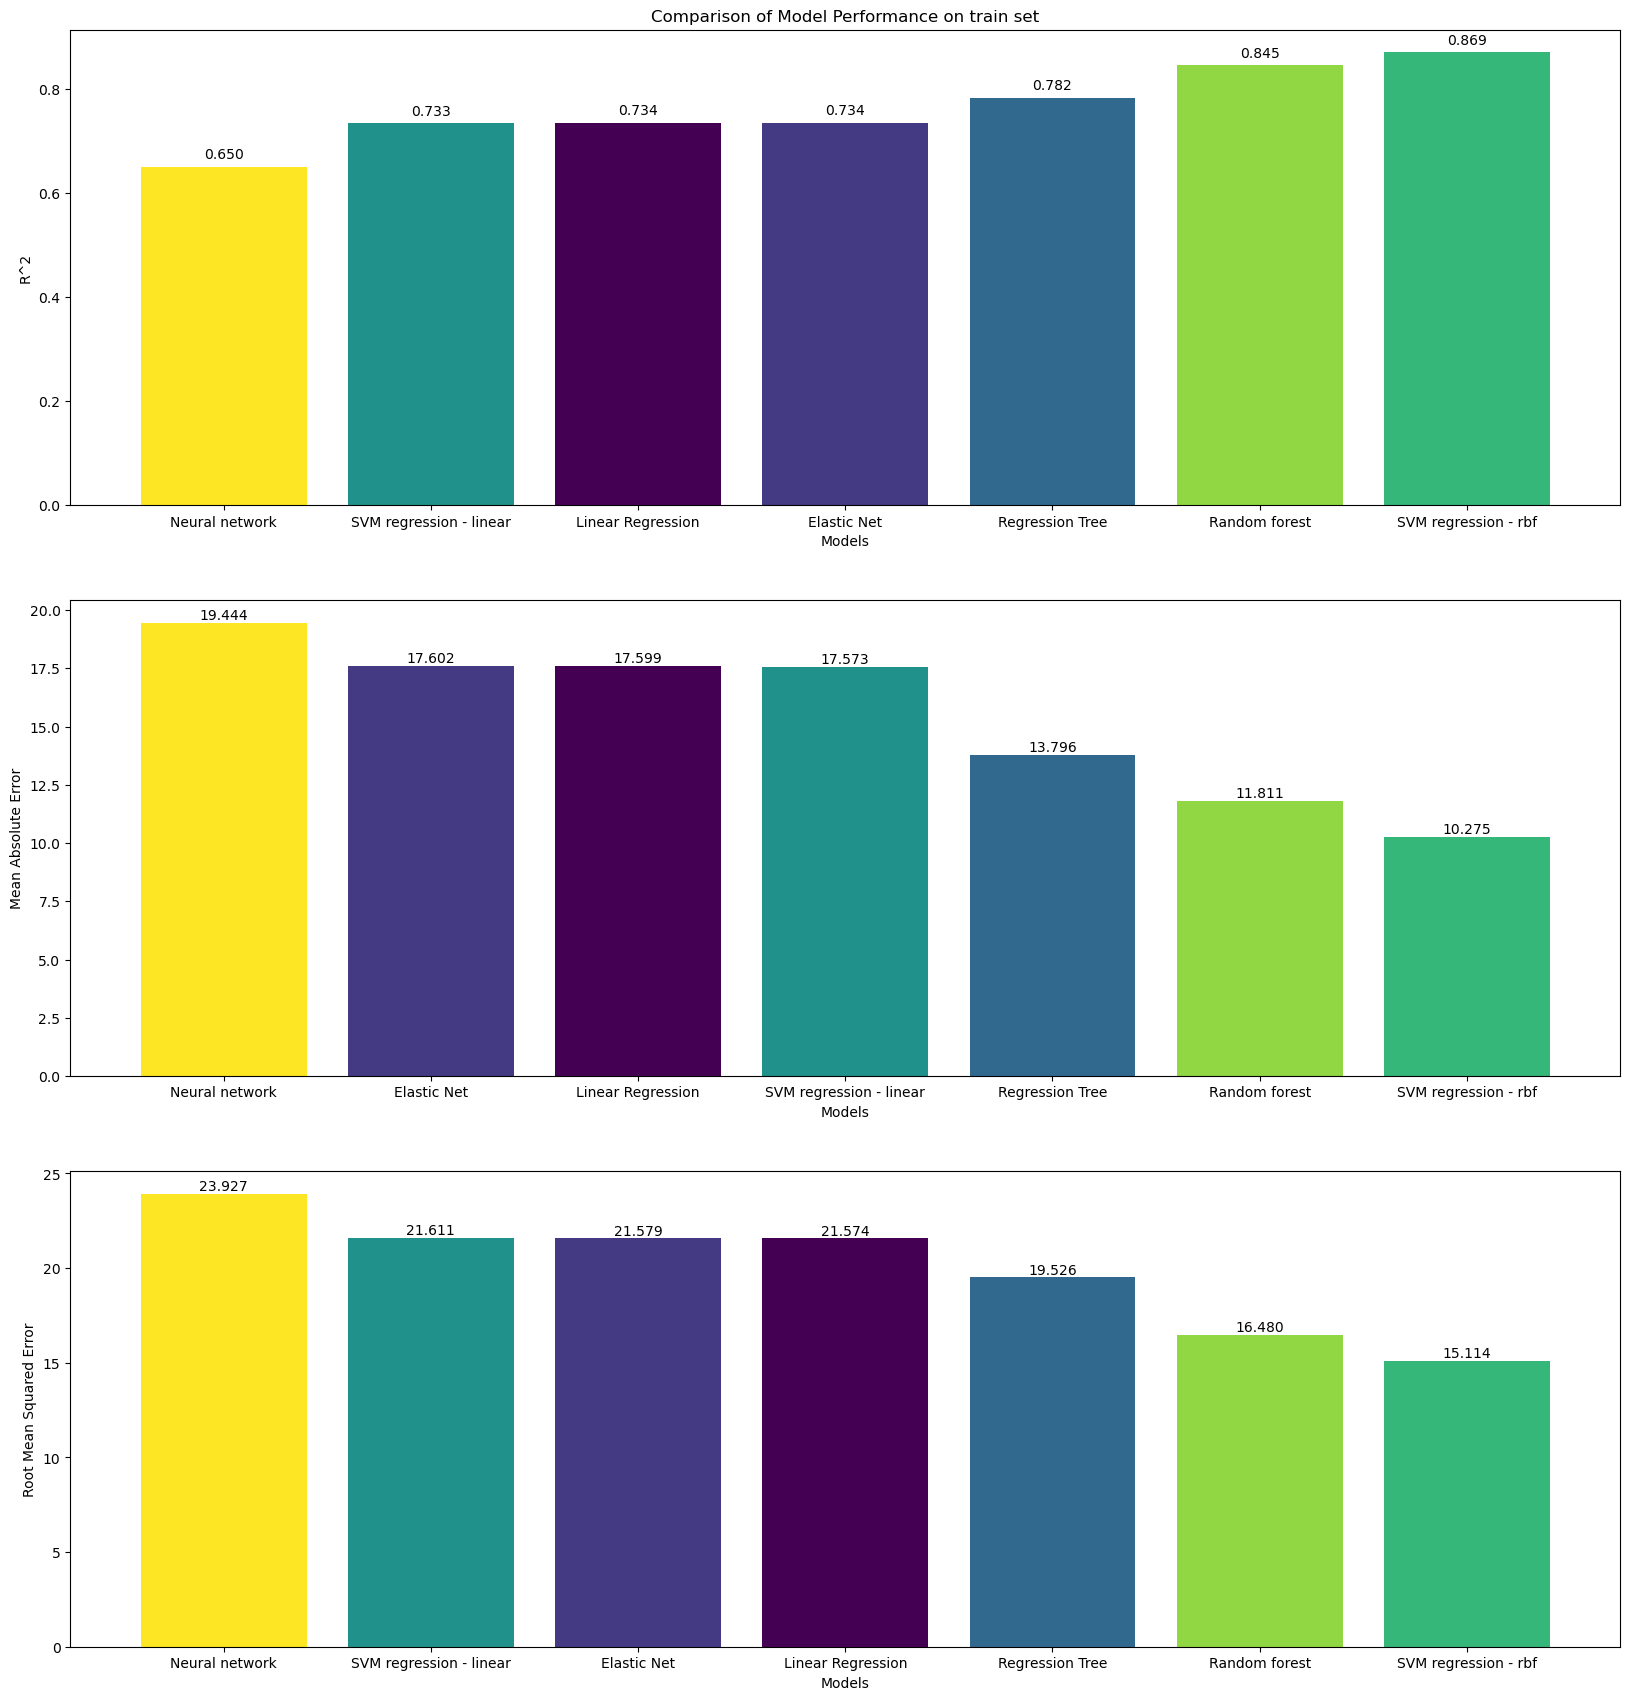

In [ ]:
plot_comparison_metric(scores_to_plot,scores_train)

Plotting the comparison based on test scores

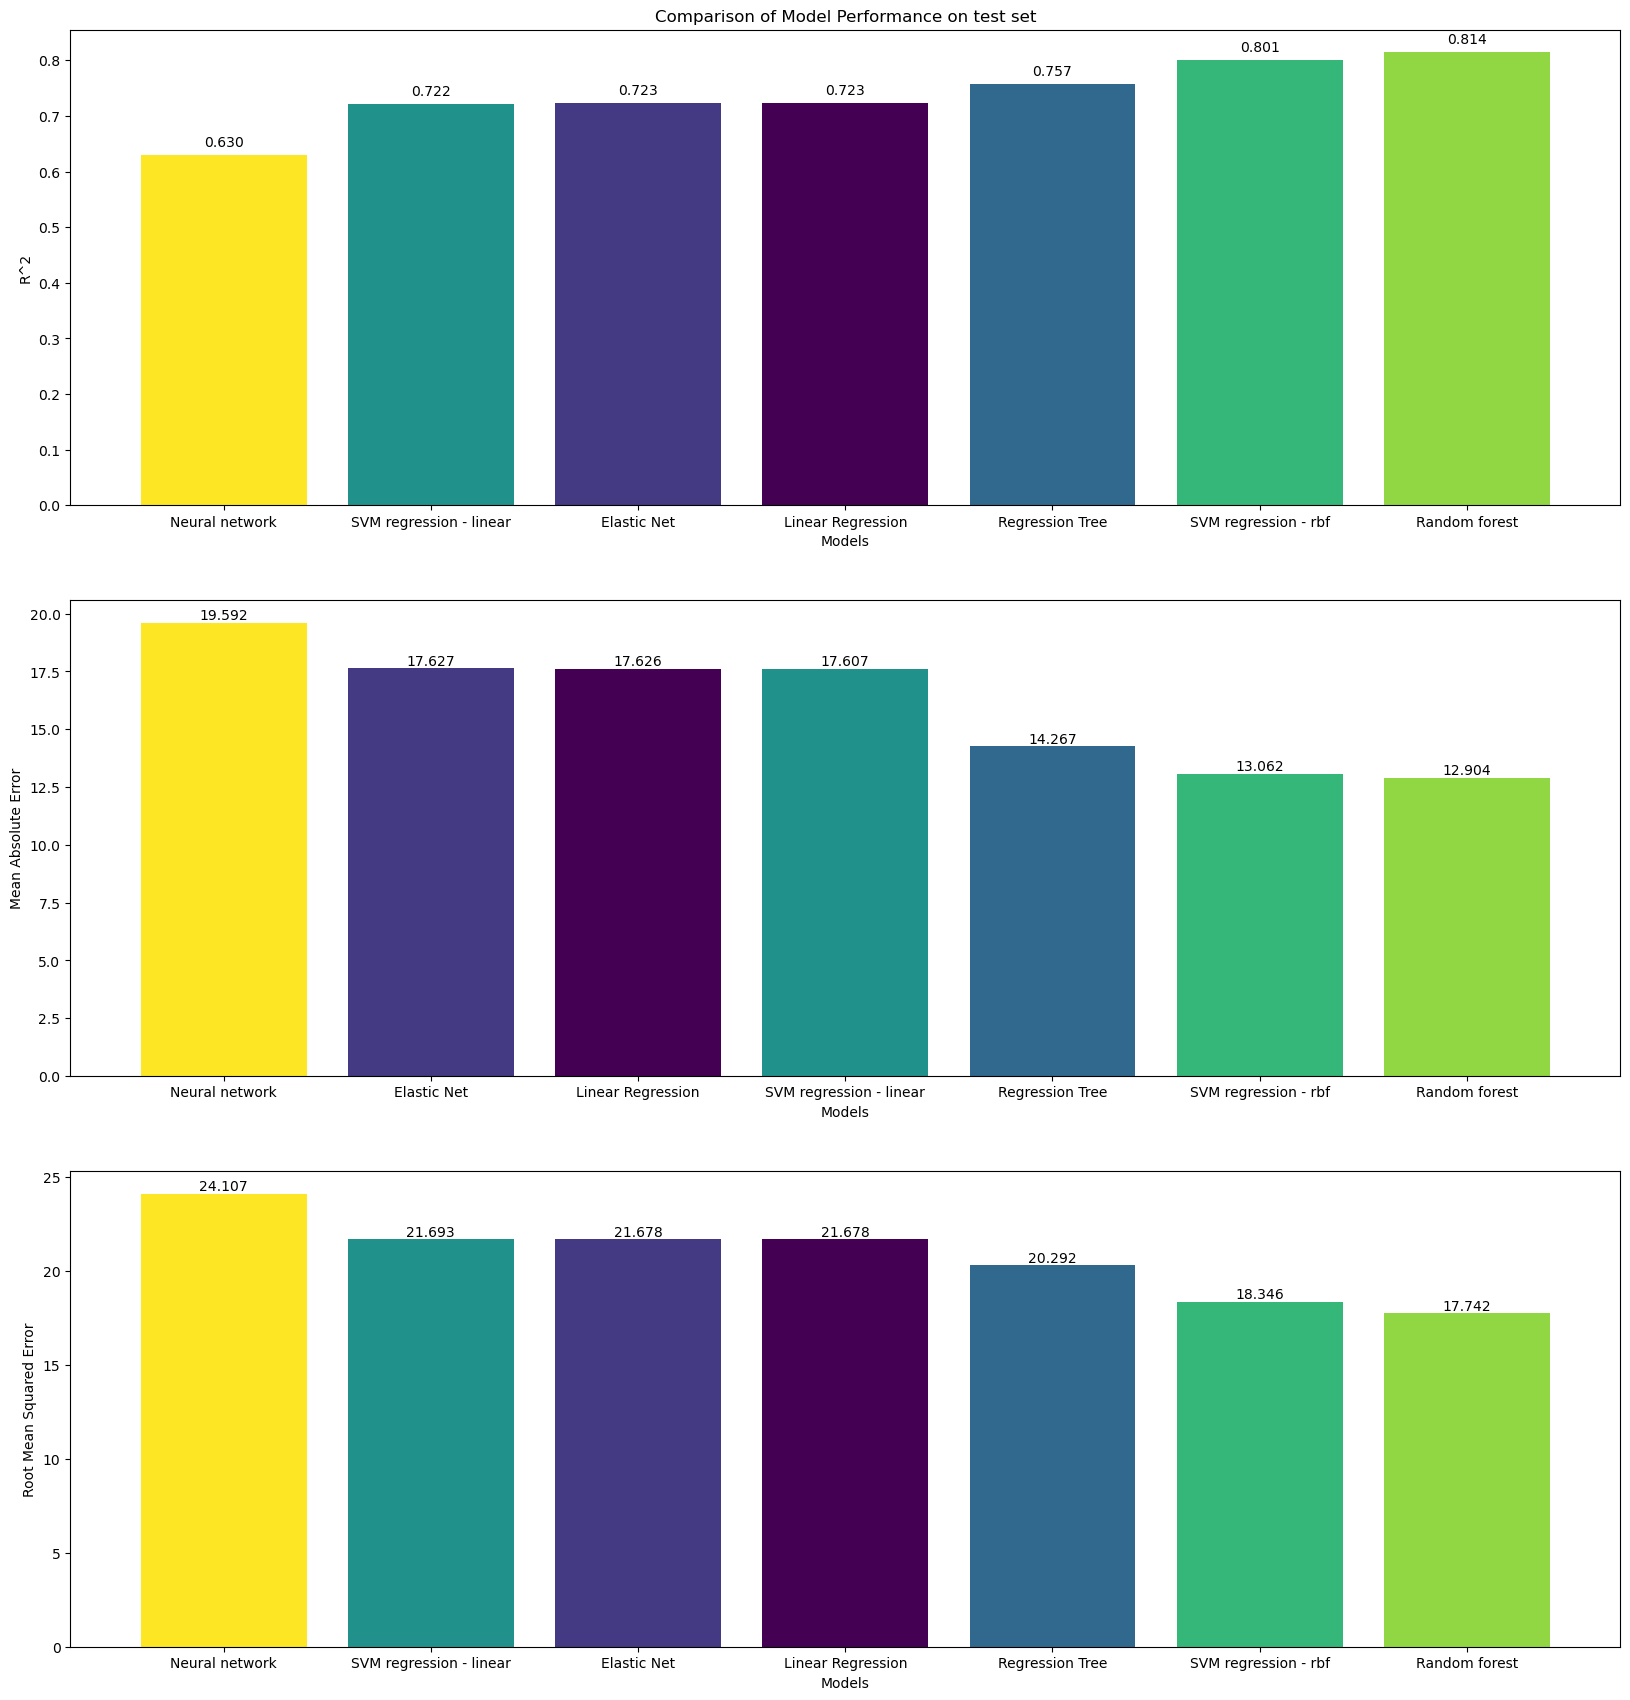

In [ ]:
plot_comparison_metric(scores_to_plot,scores_test, train=False)

End of the nootebook! 🙂